# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, 1 March, 2020, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The problem and data come from an animal shelter concerned with animal welfare and reducing the risk of animal death. The shelter wants to use the data collected about their animals to build a data analytics solution for death risk prediction to help them in their planning towards improving the welfare of the animals they shelter. The shelter collects some data for each animal they take in (columns in the dataset with keyword "intake") and also records the status of each animal when it left the shelter (columns in the dataset with keyword "outcome").
The target variable to predict is a binary variable called **binary_outcome**. For this variable, the value “1” indicates that after intake, the animal outcome was negative, e.g., "death", while the value "0" indicates that the animal outcome was a positive one, e.g., was adopted or returned to the owner.
The dataset we work with is a sample of the data released by this shelter:
https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

Each student will work with a different subset of the data. The CSV file is named using the format: **AnimalWelfareRisk-[your-student-number].csv**, e.g., **AnimalWelfareRisk-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.
    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuos and which ones as categorical types). 
    - Drop duplicate rows and columns, if any.
    - Drop constant columns, if any.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                     The PDF report should focus on the key issues identified in the data and discuss potential strategies              to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. 

(2). [30] Prepare a data quality plan for the cleaned CSV file. 
    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:
    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [1]:
#Import the required packages
#Import package pandas for data analysis
import pandas as pd

# Import package numpy for numeric computing
import numpy as np

from datetime import date #import datetime module

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

from string import ascii_letters

#import package seaborn for examining relationships between multiple variables
import seaborn as sns

#import package re for checking if a particular string matches a given regular expression
import re

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

# Convert csv into dataframes. Note that original categorical data has space in front of the value, this is
# eliminated with an extra parameter.
df = pd.read_csv('AnimalWelfareRisk-19204768.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### - Check how many rows and columns this CSV has.

In [2]:
df.shape

(1000, 22)

We have a 1000 animals with 22 features associated with each animal.

### - Print the first and the last 5 rows.

In [3]:
df.head(5)  

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A801051,*Lipizzan,07/30/2019 02:45:00 PM,07/30/2019 02:45:00 PM,4738 South Interstate Highway 35 in Austin (TX),Stray,Normal,Cat,Intact Female,1 month,...,*Lipizzan,10/16/2019 11:48:00 AM,10/16/2019 11:48:00 AM,06/17/2019,Cat,Spayed Female,3 months,Domestic Shorthair,Brown Tabby,0.0
1,A691399,NaN,11/03/2014 05:32:00 PM,11/03/2014 05:32:00 PM,E Stassney Ln And Mira Dr in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,...,NaN,11/07/2014 04:34:00 PM,11/07/2014 04:34:00 PM,11/03/2012,Dog,Spayed Female,2 years,Boston Terrier Mix,Brown Brindle/White,0.0
2,A795934,Booties,05/26/2019 01:09:00 PM,05/26/2019 01:09:00 PM,4522 Felicity Lane in Austin (TX),Stray,Normal,Cat,Intact Female,4 weeks,...,Booties,11/04/2019 01:13:00 PM,11/04/2019 01:13:00 PM,04/26/2019,Cat,Intact Female,6 months,Domestic Shorthair,Blue/White,0.0
3,A706306,*Camron,06/27/2015 12:22:00 PM,06/27/2015 12:22:00 PM,Loyola Ln & Johnny Morris Rd in Austin (TX),Stray,Injured,Cat,Intact Female,2 months,...,*Camron,07/02/2015 01:00:00 PM,07/02/2015 01:00:00 PM,04/05/2015,Cat,Intact Female,2 months,Domestic Shorthair Mix,Black/Tortie,0.0
4,A711401,*Silver,09/06/2015 01:23:00 PM,09/06/2015 01:23:00 PM,8204 Sam Rayburn #1 in Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,2 months,...,*Silver,09/08/2015 05:12:00 PM,09/08/2015 05:12:00 PM,07/06/2015,Dog,Spayed Female,2 months,Chihuahua Shorthair Mix,Tan/White,0.0


In [4]:
df.tail(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
995,A688008,Tequila,12/07/2014 12:18:00 PM,12/07/2014 12:18:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,3 years,...,Tequila,12/06/2014 12:38:00 PM,12/06/2014 12:38:00 PM,09/12/2011,Dog,Spayed Female,3 years,Staffordshire,Fawn/White,0.0
996,A794262,NaN,05/06/2019 07:06:00 AM,05/06/2019 07:06:00 AM,Krebs And South Congress in Austin (TX),Stray,Sick,Cat,Spayed Female,8 years,...,NaN,05/06/2019 09:03:00 AM,05/06/2019 09:03:00 AM,05/06/2011,Cat,Spayed Female,8 years,Domestic Shorthair Mix,Black,1.0
997,A792853,NaN,04/16/2019 11:48:00 AM,04/16/2019 11:48:00 AM,11066 Pecan Park in Cedar Park (TX),Stray,Normal,Cat,Unknown,1 week,...,NaN,04/18/2019 10:04:00 AM,04/18/2019 10:04:00 AM,04/09/2019,Cat,Unknown,1 weeks,Domestic Shorthair Mix,Blue Tabby,0.0
998,A741707,NaN,01/07/2017 07:45:00 AM,01/07/2017 07:45:00 AM,Mcneil & Parmer in Austin (TX),Stray,Normal,Cat,Intact Female,4 weeks,...,NaN,01/08/2017 09:27:00 AM,01/08/2017 09:27:00 AM,12/07/2016,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Orange,0.0
999,A763769,NaN,12/15/2017 05:03:00 PM,12/15/2017 05:03:00 PM,4701 Monterey Oaks Blvd in Austin (TX),Wildlife,Injured,Bird,Unknown,1 year,...,NaN,12/15/2017 06:42:00 PM,12/15/2017 06:42:00 PM,12/15/2016,Bird,Unknown,1 year,Hawk,Brown,1.0


In [5]:
# Clean the column names to remove white space after the name or in the name
df.columns = df.columns.str.replace(' ', '')

### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types). 

In [6]:
df.dtypes

AnimalID               object
Name_Intake            object
DateTime_Intake        object
MonthYear_Intake       object
FoundLocation          object
IntakeType             object
IntakeCondition        object
AnimalType_Intake      object
SexuponIntake          object
AgeuponIntake          object
Breed_Intake           object
Color_Intake           object
Name_Outcome           object
DateTime_Outcome       object
MonthYear_Outcome      object
DateofBirth            object
AnimalType_Outcome     object
SexuponOutcome         object
AgeuponOutcome         object
Breed_Outcome          object
Color_Outcome          object
binary_outcome        float64
dtype: object

Based on examining the data in a spreadsheet program, the following decisions were made about the data convertions:

- the *'AgeuponIntake'* and *'AgeuponOutcome'* columns which are **object** was converted to **int64**. We achieve this by converting the unit of age to days and only keep the int days data. Note that here **the convertion are done by utilizing the intake date, outcome date and date of birth**, i.e. instead of using the data of 'AgeuponIntake' and 'AgeuponOutcome', we get the exact dates by subtracting the 'DateTime_Intake' with 'Date of Birth'(for intake age) and by subtracting the 'DateTime_Outcome' with 'Date of Birth'(for outcome age). This decision is made **because the data in age columns are not accurate**(e.g. some animals are a few days years old but the age is simply 0). To do this conversion, the type of 'DateTime_Intake', 'Date of Birth', and 'DateTime_Outcome' have to be converted to datetime64 first. **These changes do not represent the final type of these columns**, they will then be converted to appropriate data type for analysis after aiding the calculation of ages.
- the *'DateTime_Intake'*, *'MonthYear_Intake'* , *'DateTime_Outcome'* , *'DateTime_Outcome'*, and *'Date of Birth'* columns which are **object** was converted to **categorical** after grouping by months from *1-12*(each representing a different month, thus a different category) since dates are not continuous data(do not have standard deviation, minimum nad maximum are not meaningful at all) and this conversion enable further analysis of its influencce on outcome is .
- all other **object** values were converted to **categorical** as they contained finite set of possible values.
- the *'binary_outcome'* column which is **float64** was converted to **categorical** because it contained only 2 possible values, 1.0 or 0.0, representing different *animal's outcomes*.

In [7]:
# Turn all the feature about that needs for calculating age into type datetime64
df['DateTime_Intake'] = df['DateTime_Intake'].astype('datetime64') 
df['DateTime_Outcome'] = df['DateTime_Outcome'].astype('datetime64') 
df['DateofBirth'] = df['DateofBirth'].astype('datetime64') 

In [8]:
#Convert ages to exact days in order to further convert them to int type

def convert_to_days(column,column_index,inOrOut): 
    '''function to convert age from different units to exact days and automatically change type of the whole columnto int64'''
    for row_index in range(len(column)):  #for each row index of length of input column
        age=df.iat[row_index, column_index] #get content of the cell based on row and column index
        birthday=df.iat[row_index, df.columns.get_loc("DateofBirth")]  #get date of birth of the same row of input column
        InOrOut_day=df.iat[row_index, inOrOut] #get intake date or out date of the same row of input column
        newAge=(InOrOut_day-birthday).days #find the exact days(type is int64) by doing subtraction between these two
        df.iloc[[row_index], [column_index]]=newAge  #assgin to the corresponding cell of input column
             
convert_to_days(df['AgeuponIntake'],df.columns.get_loc("AgeuponIntake"),df.columns.get_loc("DateTime_Intake"))
convert_to_days(df['AgeuponOutcome'],df.columns.get_loc("AgeuponOutcome"),df.columns.get_loc("DateTime_Outcome")) 

In [9]:
# Turn all the feature about that needs for calculating age or about datetimes into type datetime64
df['DateTime_Intake'] = df['DateTime_Intake'].astype('datetime64') 
df['MonthYear_Intake'] = df['MonthYear_Intake'].astype('datetime64') 
df['DateTime_Outcome'] = df['DateTime_Outcome'].astype('datetime64') 
df['MonthYear_Outcome'] = df['MonthYear_Outcome'].astype('datetime64') 
df['DateofBirth'] = df['DateofBirth'].astype('datetime64') 

In [10]:
def get_months_only(column,column_index):
    '''function to convert dates/datetimes to category that grouped by month'''
    for row_index in range(len(df[column])):
        month=df.iat[row_index, df.columns.get_loc(column)].month
        df.iloc[[row_index], [column_index]]=month
        
get_months_only('DateTime_Intake',df.columns.get_loc('DateTime_Intake'))
get_months_only('DateTime_Outcome',df.columns.get_loc('DateTime_Outcome'))
get_months_only('DateofBirth',df.columns.get_loc('DateofBirth'))
get_months_only('MonthYear_Intake',df.columns.get_loc('MonthYear_Intake'))
get_months_only('MonthYear_Outcome',df.columns.get_loc('MonthYear_Outcome'))

In [11]:
df.dtypes

AnimalID               object
Name_Intake            object
DateTime_Intake         int64
MonthYear_Intake        int64
FoundLocation          object
IntakeType             object
IntakeCondition        object
AnimalType_Intake      object
SexuponIntake          object
AgeuponIntake           int64
Breed_Intake           object
Color_Intake           object
Name_Outcome           object
DateTime_Outcome        int64
MonthYear_Outcome       int64
DateofBirth             int64
AnimalType_Outcome     object
SexuponOutcome         object
AgeuponOutcome          int64
Breed_Outcome          object
Color_Outcome          object
binary_outcome        float64
dtype: object

In [12]:
# Select columns containing categorical data
categorical_columns = df[['FoundLocation','IntakeType','IntakeCondition','AnimalType_Intake','SexuponIntake', 'Breed_Intake', 'Color_Intake', 'AnimalType_Outcome', 'SexuponOutcome', 'Breed_Outcome', 'Color_Outcome', 'binary_outcome','MonthYear_Outcome','MonthYear_Intake','DateofBirth','DateTime_Outcome','DateTime_Intake']].columns
#binary_outcome was chosen as category because the data contains floating values representing outcome categories

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.dtypes

AnimalID                object
Name_Intake             object
DateTime_Intake       category
MonthYear_Intake      category
FoundLocation         category
IntakeType            category
IntakeCondition       category
AnimalType_Intake     category
SexuponIntake         category
AgeuponIntake            int64
Breed_Intake          category
Color_Intake          category
Name_Outcome            object
DateTime_Outcome      category
MonthYear_Outcome     category
DateofBirth           category
AnimalType_Outcome    category
SexuponOutcome        category
AgeuponOutcome           int64
Breed_Outcome         category
Color_Outcome         category
binary_outcome        category
dtype: object

In [13]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
DateTime_Intake,1000,12,6,103
MonthYear_Intake,1000,12,6,103
FoundLocation,1000,769,Austin (TX),175
IntakeType,1000,5,Stray,721
IntakeCondition,1000,8,Normal,878
AnimalType_Intake,1000,5,Dog,539
SexuponIntake,1000,5,Intact Male,338
Breed_Intake,1000,204,Domestic Shorthair Mix,290
Color_Intake,1000,115,Black/White,111
DateTime_Outcome,1000,12,8,102


### - Drop duplicate rows and columns, if any.

In [14]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [15]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])
# print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Number of duplicate (excluding first) columns in the table is:  6
Number of duplicate (including first) columns in the table is:  12


#### Result - Duplicate columns exist

*Rows* 
- There are no duplicate columns.We will also check the descriptive stats to make sure we did not miss any duplicated rows.

*Columns* 
- There are duplicate columns in the dataset. Duplicated columns might have same values yet different columns name, thus I compare against all columns values instead of names. This initially returned 6 duplicate columns. To also include the columns that were matched I include "keep=False" parameter. 
- *'Breed_Outcome'* and *'Color_Outcome'* columns are redundant and should be dropped because of the nature of what the columns describe, i.e. those are values that won't change overtime and should not repeat again.
- Some columns are also redundant becasue they are completely identical with no additional information given, including some date values. For example, *'MonthYear_Intake'* is exactly the same thing with 'DateTime_Intake', *'Name_Intake'* and *'Name_Outcome'* are also identical, thus they are dropped.


In [16]:
dfT[dfT.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Name_Intake,*Lipizzan,NaN,Booties,*Camron,*Silver,NaN,NaN,Stella,Georgia,Greenwood,...,Gustavo,NaN,Lulu,Peru,*Crimson,Tequila,NaN,NaN,NaN,NaN
DateTime_Intake,7,11,5,6,9,10,3,5,8,2,...,9,12,3,4,2,12,5,4,1,12
MonthYear_Intake,7,11,5,6,9,10,3,5,8,2,...,9,12,3,4,2,12,5,4,1,12
AnimalType_Intake,Cat,Dog,Cat,Cat,Dog,Cat,Cat,Dog,Dog,Bird,...,Cat,Dog,Dog,Cat,Dog,Dog,Cat,Cat,Cat,Bird
Breed_Intake,Domestic Shorthair,Boston Terrier Mix,Domestic Shorthair,Domestic Shorthair Mix,Chihuahua Shorthair Mix,Domestic Shorthair,Domestic Shorthair Mix,Dachshund Mix,German Shepherd Mix,Chicken Mix,...,Siamese Mix,Yorkshire Terrier Mix,Labrador Retriever,Domestic Shorthair,Pit Bull Mix,Staffordshire,Domestic Shorthair Mix,Domestic Shorthair Mix,Domestic Shorthair Mix,Hawk
Color_Intake,Brown Tabby,Brown Brindle/White,Blue/White,Black/Tortie,Tan/White,Brown Tabby,Brown Tabby,Brown/Tricolor,Red,Black/Red,...,Cream/Blue Point,Tan/Black,Black/White,Black,Brown/White,Fawn/White,Black,Blue Tabby,Orange,Brown
Name_Outcome,*Lipizzan,NaN,Booties,*Camron,*Silver,NaN,NaN,Stella,Georgia,Greenwood,...,Gustavo,NaN,Lulu,Peru,*Crimson,Tequila,NaN,NaN,NaN,NaN
DateTime_Outcome,10,11,11,7,9,10,3,6,8,3,...,9,12,3,4,2,12,5,4,1,12
MonthYear_Outcome,10,11,11,7,9,10,3,6,8,3,...,9,12,3,4,2,12,5,4,1,12
AnimalType_Outcome,Cat,Dog,Cat,Cat,Dog,Cat,Cat,Dog,Dog,Bird,...,Cat,Dog,Dog,Cat,Dog,Dog,Cat,Cat,Cat,Bird


Duplicate columns will now be dropped from the original data frame.

In [17]:
df=df.T.drop_duplicates().T
df

,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
0,A801051,*Lipizzan,7,4738 South Interstate Highway 35 in Austin (TX),Stray,Normal,Cat,Intact Female,43,Domestic Shorthair,Brown Tabby,10,6,Spayed Female,121,0
1,A691399,NaN,11,E Stassney Ln And Mira Dr in Austin (TX),Stray,Normal,Dog,Intact Female,730,Boston Terrier Mix,Brown Brindle/White,11,11,Spayed Female,734,0
2,A795934,Booties,5,4522 Felicity Lane in Austin (TX),Stray,Normal,Cat,Intact Female,30,Domestic Shorthair,Blue/White,11,4,Intact Female,192,0
3,A706306,*Camron,6,Loyola Ln & Johnny Morris Rd in Austin (TX),Stray,Injured,Cat,Intact Female,83,Domestic Shorthair Mix,Black/Tortie,7,4,Intact Female,88,0
4,A711401,*Silver,9,8204 Sam Rayburn #1 in Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,62,Chihuahua Shorthair Mix,Tan/White,9,7,Spayed Female,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A688008,Tequila,12,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1182,Staffordshire,Fawn/White,12,9,Spayed Female,1181,0
996,A794262,NaN,5,Krebs And South Congress in Austin (TX),Stray,Sick,Cat,Spayed Female,2922,Domestic Shorthair Mix,Black,5,5,Spayed Female,2922,1
997,A792853,NaN,4,11066 Pecan Park in Cedar Park (TX),Stray,Normal,Cat,Unknown,7,Domestic Shorthair Mix,Blue Tabby,4,4,Unknown,9,0
998,A741707,NaN,1,Mcneil & Parmer in Austin (TX),Stray,Normal,Cat,Intact Female,31,Domestic Shorthair Mix,Orange,1,12,Intact Female,32,0


In [18]:
# convert the types again since all types changed back to default after transposition
categorical_columns = df[['FoundLocation','IntakeType','IntakeCondition','AnimalType_Intake','SexuponIntake', 'Breed_Intake', 'Color_Intake',  'SexuponOutcome',   'binary_outcome','DateofBirth','DateTime_Outcome','DateTime_Intake']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [19]:
continuous_columns = df[['AgeuponIntake','AgeuponOutcome']].columns

# Convert data type to int64 for these columns
for column in continuous_columns:
    df[column] = df[column].astype('int64')

In [20]:
df.dtypes

AnimalID               object
Name_Intake            object
DateTime_Intake      category
FoundLocation        category
IntakeType           category
IntakeCondition      category
AnimalType_Intake    category
SexuponIntake        category
AgeuponIntake           int64
Breed_Intake         category
Color_Intake         category
DateTime_Outcome     category
DateofBirth          category
SexuponOutcome       category
AgeuponOutcome          int64
binary_outcome       category
dtype: object

### -Check for constant columns

In [21]:
df.nunique()   #check whether there are constant columns
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1) #Drop constant columns, if any.

In [22]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
DateTime_Intake,1000,12,6,103
FoundLocation,1000,769,Austin (TX),175
IntakeType,1000,5,Stray,721
IntakeCondition,1000,8,Normal,878
AnimalType_Intake,1000,5,Dog,539
SexuponIntake,1000,5,Intact Male,338
Breed_Intake,1000,204,Domestic Shorthair Mix,290
Color_Intake,1000,115,Black/White,111
DateTime_Outcome,1000,12,8,102
DateofBirth,1000,12,4,131


From the table we can see that there are no constant columns in categorical features since there are no unique value 1 in any columns.

In [23]:
# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,1000.0,783.829,1106.917713,-2.0,62.00,365.0,886.75,7670.0
AgeuponOutcome,1000.0,802.720,1104.648277,0.0,86.75,368.0,956.00,7671.0


A non zero **std** or **standard deviation** implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
<br><br>Result - No constant columns

### Check for Null Values

In [24]:
df.isnull().sum()

AnimalID               0
Name_Intake          339
DateTime_Intake        0
FoundLocation          0
IntakeType             0
IntakeCondition        0
AnimalType_Intake      0
SexuponIntake          0
AgeuponIntake          0
Breed_Intake           0
Color_Intake           0
DateTime_Outcome       0
DateofBirth            0
SexuponOutcome         0
AgeuponOutcome         0
binary_outcome         0
dtype: int64

- There are **339 null values in Name_Intake column**. We will do a further check to make sure Null values are not coded differently in other columns of this dataset. It could be that data is missing but it was not coded as Null in the original dataset.

### - Save your updated/cleaned data frame to a new csv file.

In [25]:
# Write the dataframe to a csv file
df.to_csv('AnimalWelfare_1-1_cleaned.csv', index = False)

### - Prepare a table with descriptive statistics for all the continuous features.
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [26]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

AgeuponIntake
----------

Range AgeuponIntake is:  7672
----------
Value  Number of Instances
365     93
730     87
731     34
61      31
1096    27
1461    25
366     24
1826    21
22      18
122     17
92      17
30      15
31      13
1095    12
15      11
Name: AgeuponIntake, dtype: int64 



AgeuponOutcome
----------

Range AgeuponOutcome is:  7671
----------
Value  Number of Instances
366    23
365    19
731    16
65     14
22     13
730    12
734    12
64     10
15     10
735     9
367     9
70      8
368     8
63      8
61      8
Name: AgeuponOutcome, dtype: int64 





In [27]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

AgeuponIntake                        308
AgeuponOutcome                       502


**Running Assessment:**
<br><br>

-  Examining the gaps / relationships between the minimum and maximum values and the quartile ranges, the features listed below may contain outliers. This is not a definitive list. More insight will be gained from visual analysis of these data presented on histograms and boxplots, below.
<br>

 -  AgeuponIntake
 -  AgeuponOutcome
 
**Action:**
<br><br>
-  We shall take note of this data quality issue and address it in the Data Quality Plan.
-  We shall continue to visually represent the data as it stands.

### Check logical integrity of data 
Additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

- Test 1 Check if any animals have number of age upon intake > than age upon outcome (impossible)

In [28]:
test_1 = df[['AgeuponIntake','AgeuponOutcome']][df['AgeuponIntake']>df['AgeuponOutcome']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  7


,AgeuponIntake,AgeuponOutcome
61,2458,2456
78,913,368
210,86,83
497,72,64
641,3532,3307


 - Test 2 Check if any animals have number of age upon intake <0 (impossible)

In [29]:
test_2 = df[['AgeuponIntake']][df['AgeuponIntake']<0]
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)

Number of rows failing the test:  2


,AgeuponIntake
46,-2
714,-1


 - Test 3 Check if any animals have number of age upon outcome <0 (impossible)

In [30]:
test_3 = df[['AgeuponOutcome']][df['AgeuponOutcome']<0]
print("Number of rows failing the test: ", test_3.shape[0])

Number of rows failing the test:  0


In [31]:
# Print table with descriptive statistics for all the continuous features
df_continuous_columns_data_quality_report_table=df[continuous_columns].describe().T
df_continuous_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,1000.0,783.829,1106.917713,-2.0,62.00,365.0,886.75,7670.0
AgeuponOutcome,1000.0,802.720,1104.648277,0.0,86.75,368.0,956.00,7671.0


In [32]:
# Print data quality report table for continuous features to a file.
df_continuous_columns_data_quality_report_table.to_csv("AnimalWelfareRisk-ContinuousFeatures-Table.csv", 
                                         index_label='Feature')

### - Prepare a table with descriptive statistics for all the categorical features.

In [33]:
#Assign category columns to a variable
updated_categorical_columns = df.select_dtypes(['category']).columns

In [34]:
# Print table with descriptive statistics for all the categorical features
df_category_columns_data_quality_report_table= df[updated_categorical_columns].describe().T
df_category_columns_data_quality_report_table

,count,unique,top,freq
DateTime_Intake,1000,12,6,103
FoundLocation,1000,769,Austin (TX),175
IntakeType,1000,5,Stray,721
IntakeCondition,1000,8,Normal,878
AnimalType_Intake,1000,5,Dog,539
SexuponIntake,1000,5,Intact Male,338
Breed_Intake,1000,204,Domestic Shorthair Mix,290
Color_Intake,1000,115,Black/White,111
DateTime_Outcome,1000,12,8,102
DateofBirth,1000,12,4,131


In [35]:
# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_category_columns_data_quality_report_table.to_csv("AnimalWelfareRisk-DataQualityReport-CategoryFeatures-Table.csv", 
                                         index_label='Feature')

### - Plot histograms for all the continuous features.

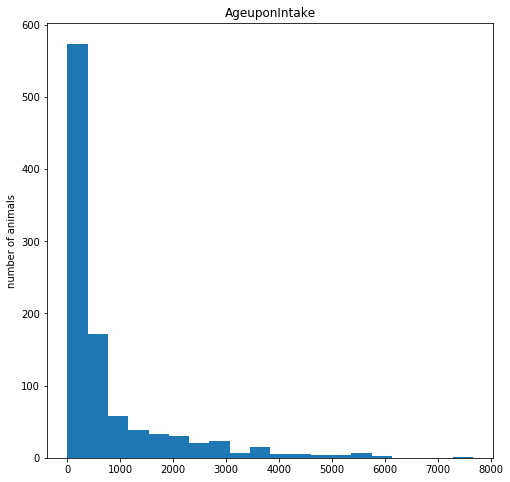

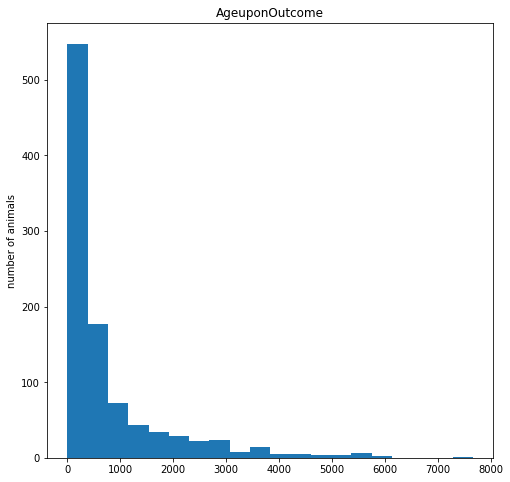

In [36]:
# Plot histograms for all the continuous features and save in a PDF file
with PdfPages('AnimalWelfare_continuous_histograms_1-1.pdf') as pp:
    for col in continuous_columns:
            f = df[col].plot(kind='hist', figsize=(8,8), bins=20)
            plt.title(col)
            plt.ylabel('number of animals')
            pp.savefig(f.get_figure())
            plt.show()   

### - Plot box plots for all the continuous features.

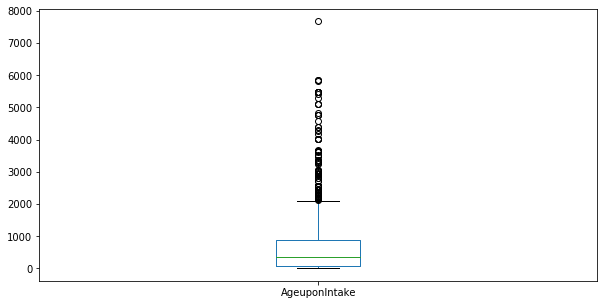

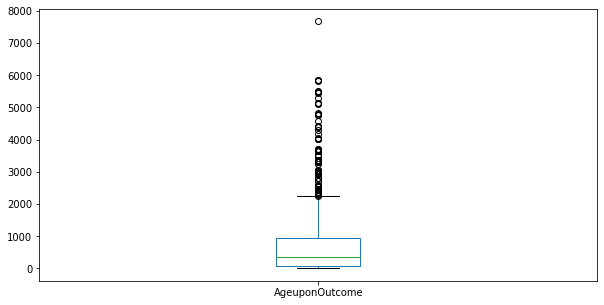

In [37]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('AnimalWelfare_continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot bar plots for all the categorical features.

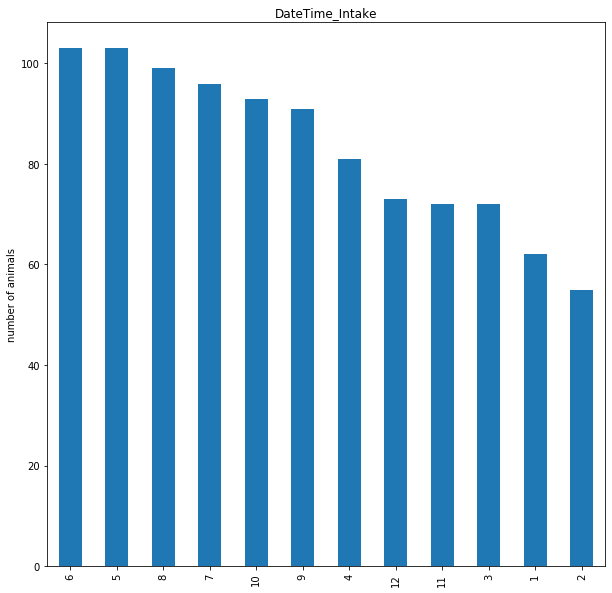

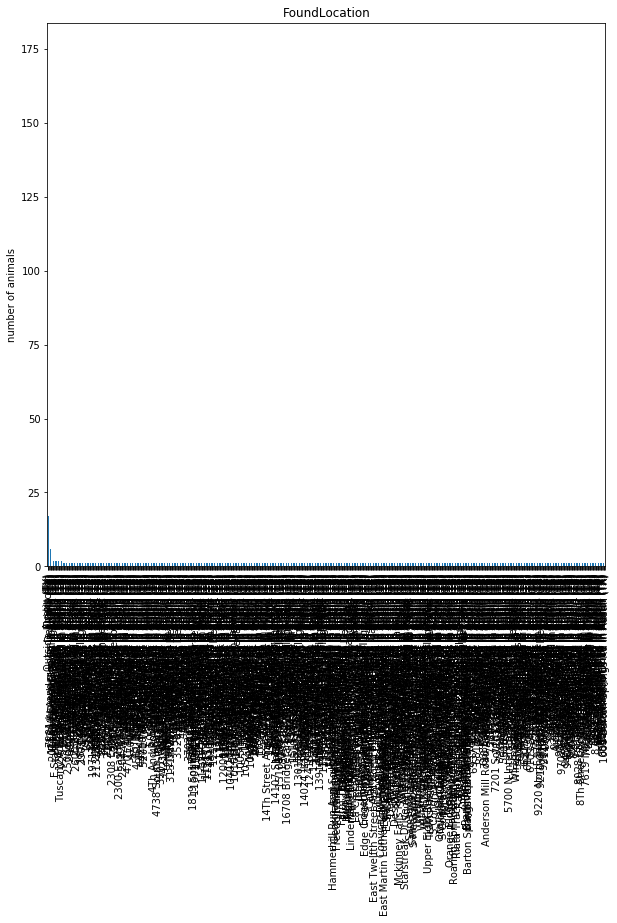

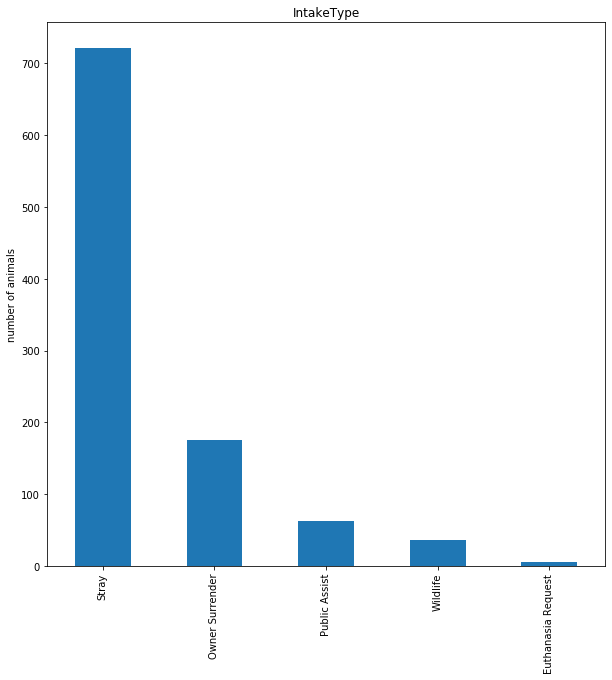

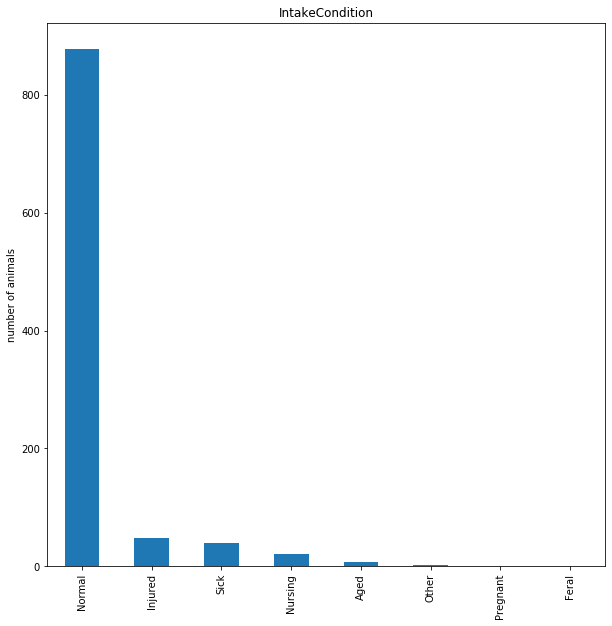

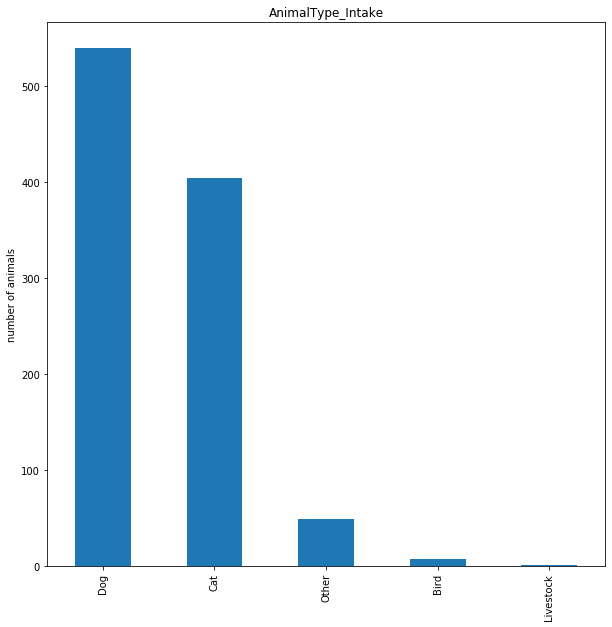

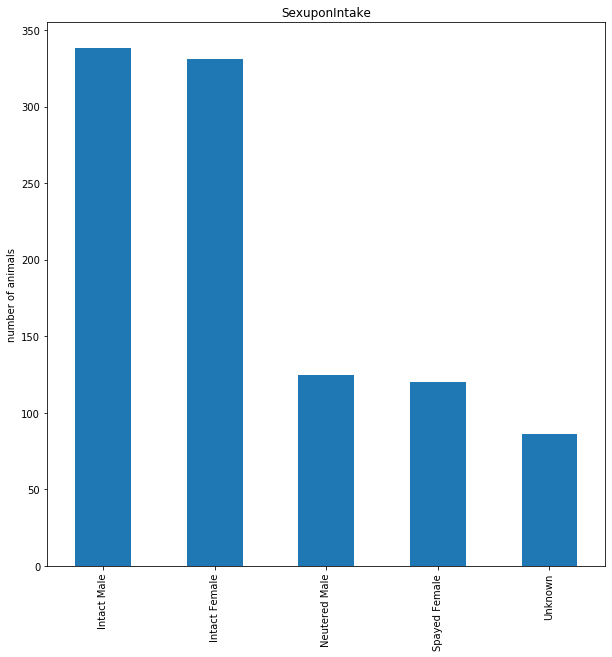

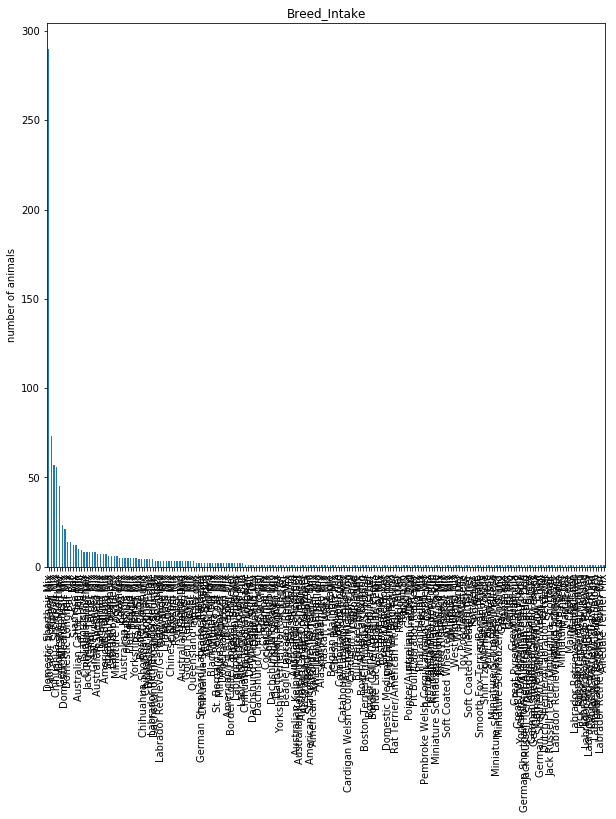

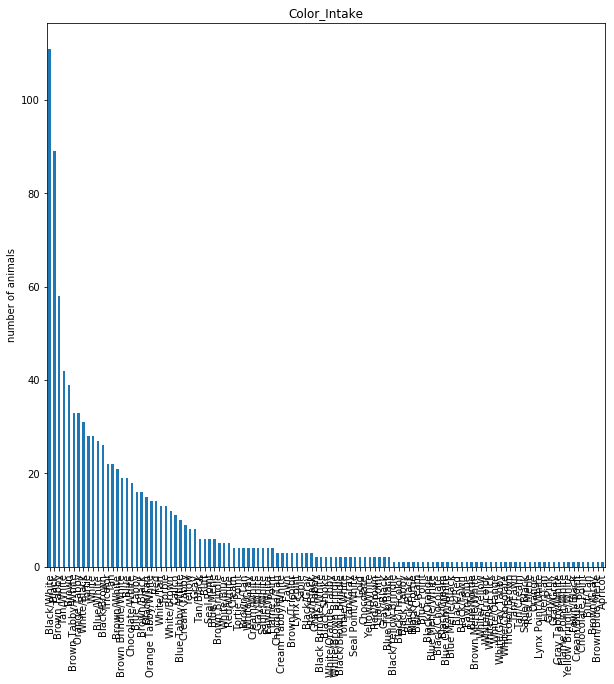

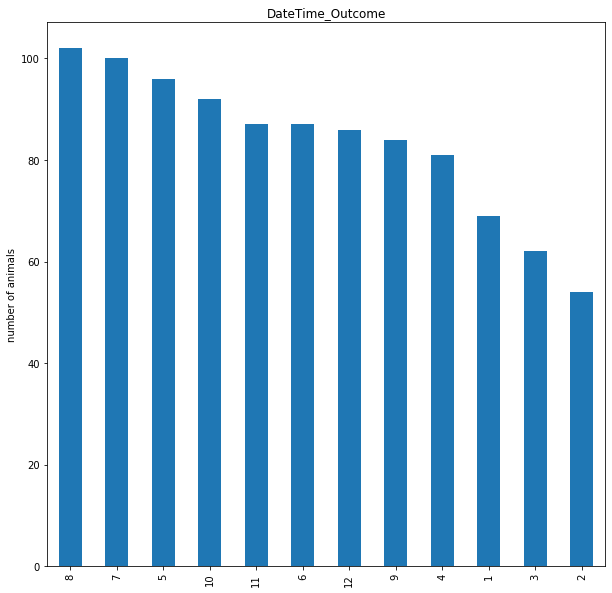

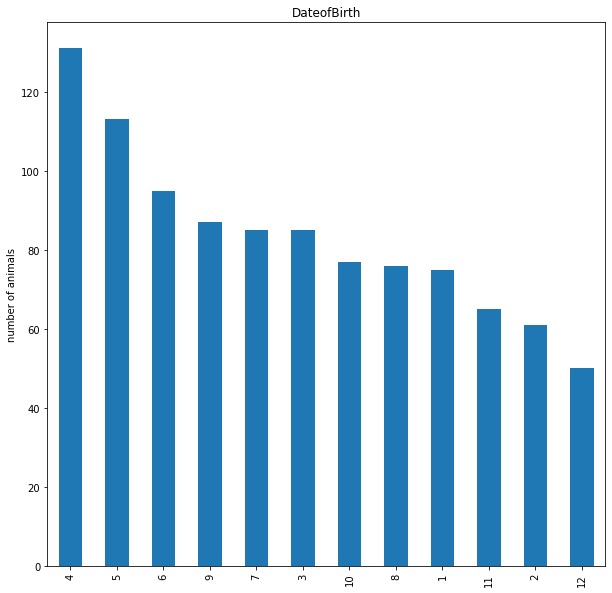

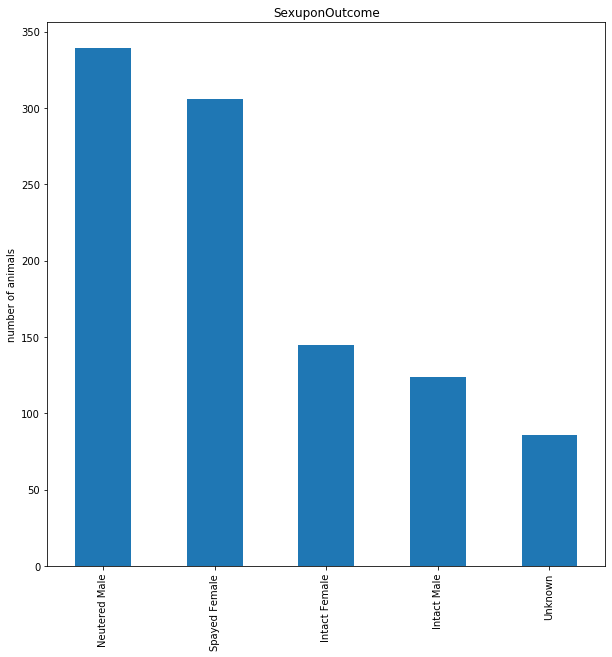

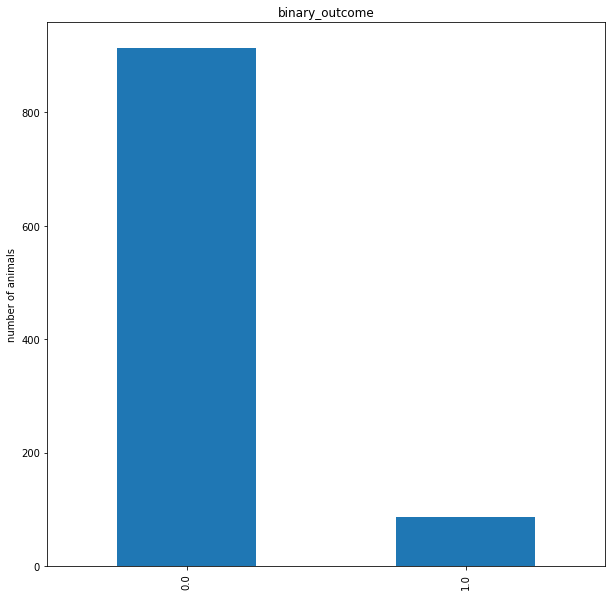

In [38]:
# Plot bar plots for all the catagorical features and save them in a single PDF file

with PdfPages('AnimalWelfare_categorical_barplots_1-1.pdf') as pp:
    for col in updated_categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(10,10))
        plt.title(col)
        plt.ylabel('number of animals')
        pp.savefig(f.get_figure())
        plt.show()

### Check for Irregular cardinalities & permitted values

In [39]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\nfound location:", pd.unique(df["FoundLocation"].ravel()))
print("Color intake:", pd.unique(df["Color_Intake"].ravel()))
print("Breed intake:", pd.unique(df["Breed_Intake"].ravel()))

Unique values for:
found location: ['4738 South Interstate Highway 35 in Austin (TX)'
 'E Stassney Ln And Mira Dr in Austin (TX)'
 '4522 Felicity Lane in Austin (TX)'
 'Loyola Ln & Johnny Morris Rd in Austin (TX)'
 '8204 Sam Rayburn #1 in Austin (TX)'
 '11601 Old Lockhart Road in Creedmoor (TX)' '9902 Plover in Austin (TX)'
 'Springville, Walking Stick in Austin (TX)'
 'Wimbledon Dr And Wightman Dr in Austin (TX)'
 '21413 Webber Oaks Cv in Travis (TX)' '9102 1/2 Happy Trl in Austin (TX)'
 'Austin (TX)' 'Del Valle (TX)'
 '5700 N Interstate 35 Frontage Rd in Austin (TX)'
 '20412 Ed Acklin Rd in Manor (TX)' 'Travis (TX)'
 '13145 Us-183 in Austin (TX)' '3131 Hwy S 183/Mc Call Rd in Austin (TX)'
 '11717 Schriber Rd in Travis (TX)' '729 Airport in Austin (TX)'
 '4477 S Lamar Blvd in Austin (TX)'
 'Nuckols Crossing Rd And Stassney Ln in Austin (TX)'
 '12001 Metric Blvd in Austin (TX)' '6111 Fm2244 in Austin (TX)'
 '8735 N Lamar Blvd in Austin (TX)'
 '1016 South Meadows Drive in Austin (TX)'
 

/Users/chungwingki/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:631: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


- Found location has irregular cardinality
- Breed intake has irregular cardinality
- Color intake has irregular cardinality

### Check for exact unknown values 

In [40]:
df['SexuponIntake'].value_counts()

Intact Male      338
Intact Female    331
Neutered Male    125
Spayed Female    120
Unknown           86
Name: SexuponIntake, dtype: int64

In [41]:
df['SexuponOutcome'].value_counts()

Neutered Male    339
Spayed Female    306
Intact Female    145
Intact Male      124
Unknown           86
Name: SexuponOutcome, dtype: int64

- The number of unknown values of sex upon intake and outcome are both 86

**Running Assessment:**

-  There are 3 **irregular cardinalities** of the Categorical features. The low value is explained as being a binary, as previously noted; and there are no very high values which could either be anomolous or present problems for machine learning algorithms. 
<br>

-  There are 86 "Unknown" category for both sex upon intake and sex upon outcome features.
Unknown is synonimous with **missing data**.
<br>
-  We shall take note of these data quality issue and address it in the Data Quality Plan.

### - Discuss your initial findings.

### - Save the initial discussion of your findings into a single data quality report PDF file.  

The discussion can be found in a pdf file called **Data_Quality_Report_Initial_Findings.pdf**

In [42]:
df.dtypes

AnimalID               object
Name_Intake            object
DateTime_Intake      category
FoundLocation        category
IntakeType           category
IntakeCondition      category
AnimalType_Intake    category
SexuponIntake        category
AgeuponIntake           int64
Breed_Intake         category
Color_Intake         category
DateTime_Outcome     category
DateofBirth          category
SexuponOutcome       category
AgeuponOutcome          int64
binary_outcome       category
dtype: object

# (2). Prepare a data quality plan for the cleaned CSV file.

### - Mark down all the features where there are potential problems or data quality issues.

The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**, plus some issues with object type of feautures:
- Age upon intake has a negative minimum value.
- Negative days in shelter is found by comparing intake and outcome days.
- Found location has irregular cardinality.
- Breed intake has irregular cardinality.
- Color intake has irregular cardinality.
- Name_Intake is a redundant column giving us the the name of the animal and it is not even a unique identifier. This gives us no useful information.
- Age upon intake has an outlier with very large value (7670).
- Age upon outcome has an outlier with very large value (7671).
- Name_Intake null value is 339 out of 1000.
- SexuponIntake is "unknown" for 86 out of 1000.
- SexuponOutcome is "unknown" for 86 out of 1000.
- Animal ID is an unique identifier not to be used as feature in data preparation.


## Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

### - Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other.

As data collection is an expensive and/or time consuming process, it is the first priority to always try to **keep as much original data intact as possible** before making any cuts/removals or modifications. Thus my decisions below are based on this principle of data preservation:

1. **Age upon intake has a negative minimum value.**
May be invalid data. Investigate how many rows are involved. Imputation will be performed where possible.  Otherwise values will be changed to 0, with a note to revisit those features later.
- **Negative days in shelter is found by comparing intake nad outcome days**
May be invalid data. Investigate how many rows are involved. Imputation will be performed where possible.  Otherwise if number is low, remove those rows, if number is high, remove the feature.
- **Found location has irregular cardinality.**
Merge the cardinalities into the same category.
- **Breed intake has irregular cardinality.**
Merge the cardinalities into the same category.
- **Color intake has irregular cardinality.**
Merge the cardinalities into the same category.
- **Name_Intake is a redundant column giving us the the name of the animal and it is not even a unique identifier. This gives us no useful information.**
As there is no useful information, this feature should be dropped.
- **Age upon intake has an outlier with very large value (7670).**
Investigate if the outlier can be justified. If it makes sense, keep it. If it doesn't make sense, remove the outlier row.
- **Age upon outcome has an outlier with very large value (7671).**
Investigate if the outlier can be justified. If it makes sense, keep it. If it doesn't make sense, remove the outlier row.
- **Name_Intake missing value is 339 out of 1000.**
As around 30% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.
- **SexuponIntake is "unknown" for 86 out of 1000.**
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.
- **SexuponOutcome is "unknown" for 86 out of 1000.**
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.
- **Animal ID is an unique identifier not to be used as feature in data preparation.**
Keep to be able to link example to actual customer, but do not use for data preparation.

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

In [43]:
# Keep a copy of the original data
df_raw = df.copy()

#### 1. **Age upon intake has a negative minimum value.**
May be invalid data. Investigate how many rows are involved. Imputation will be performed where possible.  Otherwise values will be changed to 0, with a note to revisit those features later.

In [44]:
df[df['AgeuponIntake'] < 0]

,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
46,A791457,*Inky,3,833 Fairfield Drive in Austin (TX),Stray,Normal,Cat,Intact Male,-2,Domestic Shorthair Mix,Black/White,6,3,Neutered Male,85,0.0
714,A731584,NaN,7,Austin (TX),Stray,Nursing,Dog,Intact Male,-1,Plott Hound Mix,Black,8,7,Intact Male,32,0.0


In [45]:
#See if any animals in the shelter are pregnant
df[df['IntakeCondition'] == 'Pregnant']

,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
149,A793837,NaN,4,4501 E. Riverside #1041 in Austin (TX),Stray,Pregnant,Cat,Intact Female,1095,Domestic Medium Hair Mix,White,5,4,Intact Female,1096,0.0


In [46]:
#Animals stay in shelter for longer than 10 months(~10*30days)
df[(df['AgeuponOutcome']-df['AgeuponIntake'] > 10*30)]

,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
47,A758484,Rufus,9,1301 Quailfield in Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,1096,Australian Cattle Dog/Pointer,White/Tan,10,9,Neutered Male,1493,0.0
353,A781730,*Butter,10,1402 Demaret Street in Austin (TX),Stray,Normal,Cat,Intact Male,30,Domestic Shorthair Mix,Cream Tabby,12,9,Neutered Male,471,0.0
757,A690431,*Spooky,10,Lambs Ln in Austin (TX),Stray,Normal,Cat,Intact Female,22,Domestic Longhair Mix,Black,8,9,Spayed Female,1056,0.0
853,A732792,Fifi,8,6201 Sneed Cove in Austin (TX),Stray,Normal,Cat,Intact Female,66,Domestic Shorthair Mix,Torbie,12,6,Spayed Female,1298,0.0


I initially considered the possiblity that these two animals were born inside the shelter, which could explain the negative age upon intake. But for the animal with ID A731584, although the condition of it is nursing, there is no pregnant dog(type of that animal) in the shelter at all, so it is not possible. <br>

As for the animal with ID A791457, although there is an pregnant cat(type of that animal) in the shelter's record, but since 
1. the condition of it is normal but not nursing
2. the pregnant cat only spent a day in the shelter and it left in May while A791457 was taken in in March and among the animals that stay more than 10 months in the shelter, the pregnant cat is not one of them.

Therefore, the assumption is untenable and since we want to avoid dropping any features if at all possible, the following actions will be carried:

-  Below a decision is made for each feature that contains negative values, weather imputation is feasible or if the values will be change to 0.
-  To aid in the decision the coefficient of variation will be checked. If < 1 imputation with the median will be performed. If > 1 the data will be evaluated to see if imputation with the mean is practical.
-  For cases where imputation with the mean/median is not possible due to high standard deviation, it would be possible to perform regression analysis to predict what the value would have been based on a group of the nearest neighbours. This however is deemed beyond the scope of this assignment. 
- External factors(e.g.intake condition) will also be considered when doing imputation

In [47]:
coeff_var = df['AgeuponIntake'].std()/df['AgeuponIntake'].mean()
print("Coefficient of variation is: ", round(coeff_var,2))

Coefficient of variation is:  1.41


In [48]:
print("Special value -2 \tcount")
print("AgeuponIntake\t", df[df['AgeuponIntake']== -2].shape[0])

Special value -2 	count
AgeuponIntake	 1


In [49]:
print("Special value -1 \tcount")
print("AgeuponIntake\t", df[df['AgeuponIntake']== -1].shape[0])

Special value -1 	count
AgeuponIntake	 1


In [50]:
print("The median value of this feature is: ", df['AgeuponIntake'].median())

The median value of this feature is:  365.0


The standard deviation for both special valuesis high although the rows affected are limited, both with a coefficient of variation of 1.41. This is because the age upon intake feature has significant outlier, according to the analysis of last part. Ideally a regression analysis would be performed here to determine the most appropriate value but is outside the scope of the assignment. In light of this and considering the relatively small number of rows affected, replacing with the median value is the most appropriate since over 50% of all entries are the median value

In [51]:
df['AgeuponIntake'] = df['AgeuponIntake'].replace(-2, df['AgeuponIntake'].median())

The special value -2 is replaced with the median value.

Since the animal with special value -1 is in nursing condition, replacing it with median value 365 is not making sense. Therefore, based on its age upon outcome(32) and intake condition, I decide to simply flip the negative 1 days to positive.

In [52]:
df['AgeuponIntake'] = df['AgeuponIntake'].replace(-1, 1)

#### 2. **Negative days in shelter is found by comparing intake and outcome days**
May be invalid data. Investigate how many rows are involved. Imputation will be performed where possible. Otherwise if number is low, remove those rows, if number is high, remove the feature.

In [53]:
df[df['AgeuponOutcome']-df['AgeuponIntake'] < 0]

,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
46,A791457,*Inky,3,833 Fairfield Drive in Austin (TX),Stray,Normal,Cat,Intact Male,365,Domestic Shorthair Mix,Black/White,6,3,Neutered Male,85,0.0
61,A735044,*Cupcake,12,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,2458,Pit Bull Mix,Blue,12,4,Spayed Female,2456,0.0
78,A724773,Wheatley,10,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,913,Domestic Shorthair Mix,Orange Tabby/White,4,4,Neutered Male,368,0.0
210,A812360,NaN,1,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,86,Australian Kelpie Mix,Tan/White,1,11,Spayed Female,83,0.0
497,A773719,*Pepper,7,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,72,Domestic Shorthair Mix,Black,7,5,Spayed Female,64,0.0
641,A675828,Buttercup,12,Fire Oak And Rain Creek Pkwy in Austin (TX),Stray,Normal,Dog,Spayed Female,3532,Chihuahua Shorthair Mix,Fawn,4,4,Spayed Female,3307,0.0
957,A649025,*Ayla,3,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1286,Labrador Retriever Mix,Black/White,11,9,Spayed Female,1166,0.0
995,A688008,Tequila,12,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,1182,Staffordshire,Fawn/White,12,9,Spayed Female,1181,0.0


In [54]:
len(df[(df['AgeuponOutcome']-df['AgeuponIntake'])<0])

8

Although we strive to avoid dropping any features if at all possible. But since the invalid data here is hard to impute with means or median(as it involves more than one columns ) and only seven rows affected. The affected rows will be dropped.

In [55]:
df.drop(df[(df['AgeuponOutcome']-df['AgeuponIntake'])<0].index, axis=0, inplace=True)

#### 3. **Found location has irregular cardinality.**
Merge the cardinalities into the same category.

In [56]:
df["FoundLocation"]=df["FoundLocation"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first
#to group the foundlocation by city since too if dont change too many columns and can hardly see the barplot of this column 


for row_index in range(len(df["FoundLocation"])): #for each row index of length of column "FoundLocation"
    column_index=df.columns.get_loc("FoundLocation") #get column index
    location=df.iat[row_index, column_index] #get content of the cell based on row and column index
    if ' in ' in location: #if have ' in '
        reg=re.findall(r"\sin\s(.+?)\s\(",location) #extract everything between ' in ' and '('
        df.iloc[[row_index], [column_index]]=reg #assgin to the corresponding cell of "FoundLocation"
    elif '(TX)' in location: # in the remaining column if find '(TX)'
        reg=re.findall(r"(.+?)\s\(TX\)",location) #extract everything before (TX)
        df.iloc[[row_index], [column_index]]=reg
    else:
        pass #if it is 'Outside Jurisdiction' then do nothing
df["FoundLocation"]=df["FoundLocation"].astype('category') #convert it back to 'category'

Found location are merged based on their cities.

In [57]:
print("\n- FoundLocation:", pd.unique(df.FoundLocation.ravel()))


- FoundLocation: ['Austin' 'Creedmoor' 'Travis' 'Del Valle' 'Manor' 'Lakeway'
 'Pflugerville' 'Outside Jurisdiction' 'Leander' 'Webberville'
 'Lago Vista' 'Caldwell' 'Sunset Valley' 'Cedar Park']


/Users/chungwingki/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:631: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


#### 4. **Breed intake has irregular cardinality.**
Merge the cardinalities into the same category.

In [58]:
df["Breed_Intake"]=df["Breed_Intake"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["Breed_Intake"])): #for each row index of length of column "Breed_Intake"
    column_index=df.columns.get_loc("Breed_Intake") #get column index
    breed=df.iat[row_index, column_index] #get content of the cell based on row and column index

    if "Terrier" in breed or "Bull" in breed:
        df.iloc[[row_index], [column_index]]=("Pit Bull type")        
    elif "Bat" in breed:
        df.iloc[[row_index], [column_index]]=("Bat")      
    elif df["Breed_Intake"].value_counts()[breed]<10: #if the number of that breed is lower than 10, group it to others
        df.iloc[[row_index], [column_index]]=("Others")

df["Breed_Intake"]=df["Breed_Intake"].astype('category') #convert it back to 'category'

There are too many breeds recorded, breed intakes that involved lower than 10 aniamls are thus merged to 'Others' type because breeds with a low representation won't give us much useful information. Animals belongs to bat and pit bull type are also grouped respectively for a clearer classification and analysis since, for example, bat and bat mix are treated as different types in the original data and such distinction are considered redundant.

In [59]:
print("\n- Breed_Intake:", pd.unique(df.Breed_Intake.ravel()))


- Breed_Intake: ['Domestic Shorthair' 'Pit Bull type' 'Domestic Shorthair Mix'
 'Chihuahua Shorthair Mix' 'Others' 'German Shepherd Mix'
 'Labrador Retriever Mix' 'Domestic Longhair Mix'
 'Australian Cattle Dog Mix' 'Siamese Mix' 'Domestic Medium Hair Mix'
 'Bat']


#### 5. **Color intake has irregular cardinality.**
Merge the cardinalities into the same category.

In [60]:
df["Color_Intake"]=df["Color_Intake"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first


for row_index in range(len(df["Color_Intake"])): #for each row index of length of column "Color_Intake"
    column_index=df.columns.get_loc("Color_Intake") #get column index
    color=df.iat[row_index, column_index] #get content of the cell based on row and column index
    
    if "Tabby"  in color or "Brindle"  in color or "Tortie" in color or "Torbie" in color or "Calico" in color or "Point" in color or "Tri" in color or "Calico" in color or "Sable" in color or "Tiger" in color:
        df.iloc[[row_index], [column_index]]="Pattern"

    elif '/' in color: #else if the animal have two colors(find the or sign "/")
        df.iloc[[row_index], [column_index]]="Bi color" 
    elif "Black" in color:
        df.iloc[[row_index], [column_index]]="Black" 
    elif "Fawn" in color or "Blue" in color:
        df.iloc[[row_index], [column_index]]="Blue series" 
    elif "Apricot" in color or "Fawn" in color or "Gold" in color or "Yellow" in color or "Cream" in color:
        df.iloc[[row_index], [column_index]]="Gold series"
    elif "Red" in color or "Orange" in color:
        df.iloc[[row_index], [column_index]]="Red series"
    elif "Brown" in color or "Tan" in color or "Chocolate" in color or "Buff" in color:
        df.iloc[[row_index], [column_index]]="Brown series"       
        
        pass #keep original cell content if it is one colour #but still seems too many, so try split again
df["Color_Intake"]=df["Color_Intake"].astype('category')  #convert it back to 'category'

Since there are too many types of colors, they are grouped and merged based on whether they have patterns, have more than one colors, and color series.

In [61]:
print("\n- Color_Intake:", pd.unique(df.Color_Intake.ravel()))


- Color_Intake: ['Pattern' 'Bi color' 'Red series' 'Brown series' 'Black' 'White'
 'Blue series' 'Gold series' 'Gray']


#### 6. **Name_Intake is a redundant column giving us the the name of the animal and it is not even a unique identifier. This gives us no useful information.**
As there is no useful information, this feature should be dropped.

In [62]:
df = df.drop('Name_Intake', 1)

#### 7. **Age upon intake has outliers with very large value (7670).**
Investigate if the outlier can be justified. If it makes sense, keep it. If it doesn't make sense, remove the outlier row.

In [63]:
df.sort_values(by='AgeuponIntake', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['AnimalID','AgeuponIntake','AgeuponOutcome']].head(5)

,AnimalID,AgeuponIntake,AgeuponOutcome
476,A790169,7670,7671
163,A715476,5844,5844
232,A786864,5844,5844
597,A391379,5826,5828
841,A678057,5479,5480


Here AgeuponOutcome is put along with AgeuponIntake to analyse whether the intake age outlier can be justified or not. This is because they are correlated data and we can have a more accurate judgement. We can see that there is consistency, as AgeuponIntake increases do does the AgeuponOutcome. Also we can see that the outlier of both columns belongs to the same animal with animal ID A790169.

In [64]:
df[df['AgeuponIntake'] >= 7670]

,AnimalID,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
476,A790169,3,Austin,Public Assist,Normal,Other,Unknown,7670,Bat,Brown series,3,3,Unknown,7671,1.0


The type and breed of this particular animal is unknown. I thus cannot determine whether 21 years old(7670 days) is in between the normal range of lifespan of this kind of animal. So to be on the safe side, I decided to keep it.

#### 8. **Age upon outcome has an outlier with very large value (7671).**
Investigate if the outlier can be justified. If it makes sense, keep it. If it doesn't make sense, remove the outlier row.

Since the outlier of age upon outcome belongs to the same animal as the outlier of age upon intake(as shown above), it will also be kept based on the same reason.

#### 9. **Name_Intake missing value is 339 out of 1000.**
As around 30% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

### Name_Intake has already been dropped as a feature.

#### 10. **SexuponIntake is "unknown" for 86 out of 1000.**
Unknown is synonimous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

In [65]:
#To be able to look at all rows of result
pd.set_option('display.max_rows',1000) 

In [66]:
#Have a overall look of the rows with ubknown sex upon intake
df[df['SexuponIntake'] == 'Unknown']

,AnimalID,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
6,A745484,3,Austin,Stray,Normal,Cat,Unknown,6,Domestic Shorthair Mix,Pattern,3,3,Unknown,6,0.0
17,A776777,7,Travis,Stray,Nursing,Dog,Unknown,1,Others,Black,7,7,Unknown,12,0.0
51,A718663,1,Austin,Public Assist,Normal,Other,Unknown,365,Others,Brown series,1,1,Unknown,373,0.0
71,A794080,5,Austin,Stray,Normal,Cat,Unknown,15,Domestic Shorthair Mix,Pattern,5,4,Unknown,15,0.0
76,A807113,10,Austin,Wildlife,Sick,Other,Unknown,730,Bat,Bi color,10,10,Unknown,732,1.0
97,A722894,3,Austin,Wildlife,Normal,Other,Unknown,182,Bat,Brown series,3,9,Unknown,182,1.0
98,A801516,8,Austin,Stray,Nursing,Cat,Unknown,9,Domestic Shorthair,Bi color,8,7,Unknown,9,0.0
99,A773502,6,Austin,Stray,Normal,Cat,Unknown,15,Domestic Shorthair Mix,Pattern,6,5,Unknown,15,0.0
107,A684000,7,Austin,Stray,Normal,Cat,Unknown,9,Others,Pattern,7,7,Unknown,9,0.0
111,A738047,11,Travis,Stray,Normal,Cat,Unknown,7,Domestic Shorthair Mix,Black,11,11,Unknown,7,0.0


Given that both 'SexuponIntake' and 'SexuponOutcome' have 86 animals of unknown sex and by looking at the above table, it seems that the **animals that have unknown sex type for 'SexuponIntake' also have unknown sex for 'SexuponOutcome'**. 

In [67]:
df[df['SexuponIntake'] == 'Unknown']['AnimalType_Intake'].value_counts()

Other        40
Cat          38
Bird          5
Dog           2
Livestock     1
Name: AnimalType_Intake, dtype: int64

All types of animals have members with unknown sex upon intake

In [68]:
df[df['SexuponIntake'] == 'Unknown']['Breed_Intake'].value_counts()

Domestic Shorthair Mix       33
Bat                          26
Others                       22
Domestic Shorthair            4
Pit Bull type                 1
Siamese Mix                   0
Labrador Retriever Mix        0
German Shepherd Mix           0
Domestic Medium Hair Mix      0
Domestic Longhair Mix         0
Chihuahua Shorthair Mix       0
Australian Cattle Dog Mix     0
Name: Breed_Intake, dtype: int64

In [69]:
df['Breed_Intake'].value_counts()['Bat']

26

**The sex of all bats are unknown**

Although for the affected rows, the sex upon intake is unknown, but since among those animals:
- all animal types are covered
- the sex of all bats are unknown

We can see that the animals with unknown sex covered a wide range and we will have no bats to anaylse if we remove such rows.
Thus based on the principle that we try to keep as much data as possible  and animals with no sex information can still give us critical and precious data to help anayse how the various input affect the outcome, **those rows with unknown sex are decided to be kept**.

#### 11. **SexuponOutcome is "unknown" for 86 out of 1000.**
Unknown is synonimous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

As analyse above, the rows with "unknown" sex type of Sex upon outcome have the same with sex upon intake. And thus the unknown values of sex upon outcome will also be kept based on the same reasons.

#### 12. **Animal ID is an unique identifier not to be used as feature in data preparation.**
Keep to be able to link example to actual customer, but do not use for data preparation

No action needed here

In [70]:
df.dtypes

AnimalID               object
DateTime_Intake      category
FoundLocation        category
IntakeType           category
IntakeCondition      category
AnimalType_Intake    category
SexuponIntake        category
AgeuponIntake           int64
Breed_Intake         category
Color_Intake         category
DateTime_Outcome     category
DateofBirth          category
SexuponOutcome       category
AgeuponOutcome          int64
binary_outcome       category
dtype: object

### Summary of data quality plan:
   
| Feature                 | Data Quality Issue                             | Handling Strategy               |
|-------------------------|------------------------------------------------|---------------------------------|
| AnimalID                | Not data preparation feature                   | Do nothing                      |
| Name_Intake             | No useful information, missing values(~30%)    | Remove column                   |
| DateTime_Intake         | None                                           | Do nothing             | 
| FoundLocation           | Cardinality                                    | Merge synonimous cardinalities  |
| IntakeType              | None                                           | Do nothing                      |
| IntakeCondition         | None                                           | Do nothing                      |
| AnimalType_Intake       | None                                           | Do nothing                      |
| SexuponIntake           | Missing Values (~9%)                           | Do nothing                         |
| AgeuponIntake           | Negative Value (2 rows), Outlier                | Imputation , do nothing |     
| Breed_Intake            | Cardinality                                    | Merge synonimous cardinalities  |     
| Color_Intake            | Cardinality                                    | Merge synonimous cardinalities  |    
| DateTime_Outcome        | None                                           | Do nothing                      |
| DateofBirth             | None                                           | Do nothing                      |
| SexuponOutcome          | Missing Values (~9%)                           | Do nothing                          |
| AgeuponOutcome          | Outlier, 8 values smaller than intake age                                        | Do nothing, drop rows                      |
| binary_outcome          | None                                           | Do nothing             | 

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file.

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [71]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,992.0,780.548387,1105.729441,0.0,62.00,365.0,783.25,7670.0
AgeuponOutcome,992.0,800.413306,1104.058498,0.0,87.75,368.0,910.25,7671.0


In [72]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
DateTime_Intake,992,12,6,103
FoundLocation,992,14,Austin,839
IntakeType,992,5,Stray,719
IntakeCondition,992,8,Normal,870
AnimalType_Intake,992,5,Dog,534
SexuponIntake,992,5,Intact Male,337
Breed_Intake,992,12,Others,295
Color_Intake,992,9,Bi color,407
DateTime_Outcome,992,12,8,102
DateofBirth,992,12,4,128


In [73]:
# Write the dataframe to a csv file
df.to_csv('AnimalWelfare_1-2_cleaned.csv', index=False)

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The choices made in this part are based on the idea that these particular features can affect the survival rate or favor by adopters and thus push the animals towards a positive outcome. Further reasons will also be provided individually for each choice made.

The features that I will look at for pairwise feature interaction are the following continuous features:
- AgeuponIntake
  - I pick age upon intake because people might favour aniamls that are young upon taken into the shelter, i.e., didn't spend much time for e.g. being stray animals/pet by previous owners.
- AgeuponOutcome
  - I pick age upon outcome because people might favour younger animals

and the following categorical features:

- IntakeType
  - I pick intake type because some intake types are more likely to be well treated and thus more likely to survive.
- IntakeCondition
  - I pick intake condition because animals with certain conditions can have higher fatality rate and less likely to be adopted.
- AnimalType_Intake
  - I pick animal type because pets with certain types are more likely to be adopted.
- Breed_Intake
  - I pick breed because pets with certain breeds are more likely to be adopted.
- Color_Intake
  - I pick colour because pets with certain colours are more likely to be adopted. For example, black animals might be least likely to be adopted because they are difficlut to photograph well and hence diffuclt to advertise.
- DateTime_Outcome
  - I pick outcome datetime(months) because people might prefer having pets in certain months. For example, people might want to adopt a pet as gifts to others during months with holidays(e.g. Chirstmas).
- SexuponOutcome
  - I pick Sex upon outcome because people might prefer certain sex and those animals are thus more likely to be adopted.
- binary_outcome
This is the target feature to be compared with.
<br>

The features that I will **not** look at for pairwise feature interaction are the following : 
- DateofBirth
  - I don't pick birthday because birthday is arbitrary and should have no impact whatsoever on the outcome.
- SexuponIntake
  - I don't pick SexuponIntake because it should have no impact on both adoption or survival rate and thus won't affect the outcome.
- DateTime_Intake
  - I don't pick datetime intake because intake datetime is arbitrary and should have no impact whatsoever on the outcome.
- FoundLocation
  - I don't pick found location because again, location found is arbitrary and no matter where they were found, they will be in the same animal shelter, and it is scarcely possible that people adopt an animal because it was found in certain location. Therefore, it should have no impact whatsoever on the outcome.



### Correlations for the numeric features

In [74]:
df.dtypes

AnimalID               object
DateTime_Intake      category
FoundLocation        category
IntakeType           category
IntakeCondition      category
AnimalType_Intake    category
SexuponIntake        category
AgeuponIntake           int64
Breed_Intake         category
Color_Intake         category
DateTime_Outcome     category
DateofBirth          category
SexuponOutcome       category
AgeuponOutcome          int64
binary_outcome       category
dtype: object

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

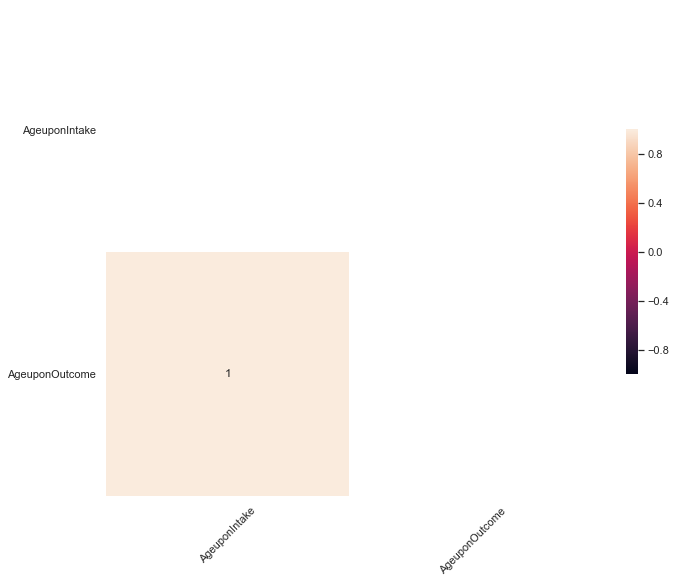

In [75]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

sns.set(style="white")
continuous_columns1 = ['AgeuponIntake','AgeuponOutcome']
# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns1].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
# cmap = sns.diverging_palette(220, 10, as_cmap=True) cmap=cmap,

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask,  vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


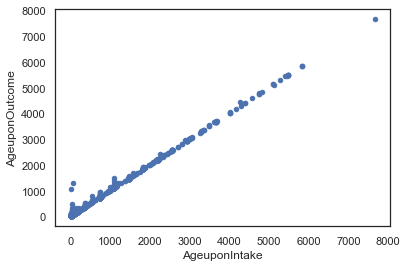

In [76]:
# df.plot(kind='scatter', x='AgeuponIntake', y='binary_outcome')
# df.plot(kind='scatter', x='AgeuponOutcome', y='binary_outcome')
df.plot(kind='scatter', x='AgeuponIntake', y='AgeuponOutcome')

The continuous features above were chosen as we believed they could have a strong impact on binary outcome.

- We see a very strong correlation (1) between the age upon intake and age upon outcome


- From this we do not get much additional information only that the one of the feature may be redundant since they show very similar data

### Categorical vs Categorical feature plots

IntakeType
Index 	 Count
Stray 	 719
Owner Surrender 	 170
Public Assist 	 62
Wildlife 	 36
Euthanasia Request 	 5


(0, 100)

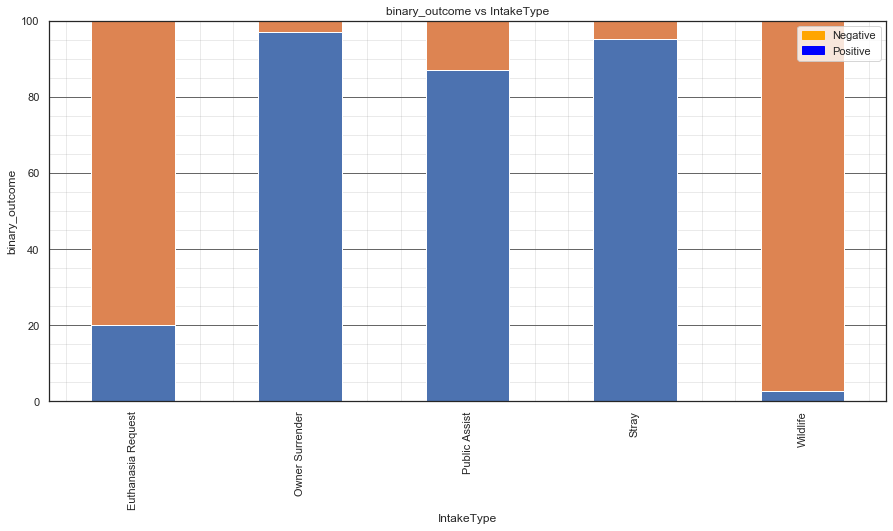

In [77]:
#Using code from the module lab
import matplotlib.patches as mpatches
IntakeType = pd.unique(df["IntakeType"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("IntakeType")
print("Index \t Count")

# for each delinquency category
for i in IntakeType:
    
    count = df[df["IntakeType"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['IntakeType'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','IntakeType','binary_outcome']].groupby(['IntakeType','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs IntakeType", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("IntakeType")
my_plot.set_ylabel("binary_outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for intake type against the target binary outcome. 

- A significant amount of euthanasia request animals have a negative outcome, approx 80%.
- Approx 97% of wildlife have a negative outcome, whcih is an extremely large number.
- All other intake types have similar outcome percentage for around 3-15% of negative outcome, including owner surrender, public assist and stray animals.
- This indicates that a aniaml that have euthanasia request before entering the shelter or have lived in the wild have a significantly higher negative outcome.

- In summary 
    - If animals are wildlife there is approx 97% likelihood of a negative outcome
    - If animals hold a euthanasia request there is approx 80% likelihood of a negative outcome
    - Intake type is a good marker to predict the outcome.

IntakeCondition
Index 	 Count
Normal 	 870
Injured 	 49
Nursing 	 21
Sick 	 40
Aged 	 7
Pregnant 	 1
Other 	 3
Feral 	 1


(0, 100)

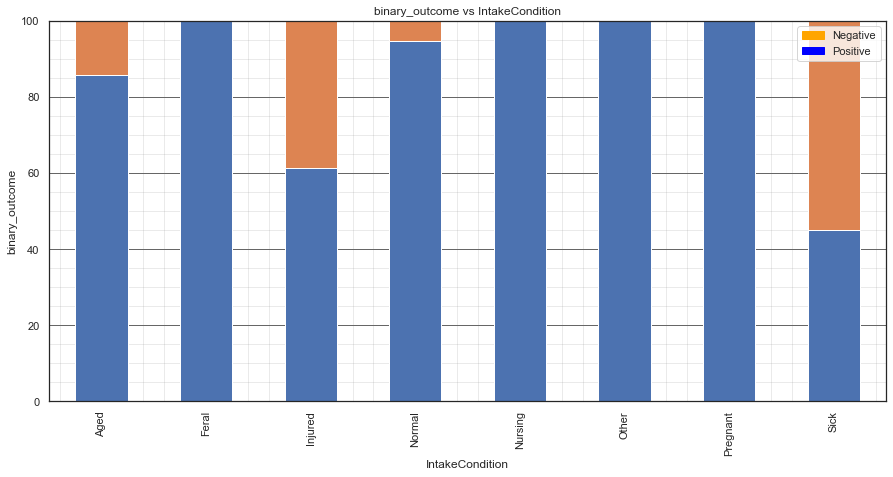

In [78]:
#Using code from the module lab
import matplotlib.patches as mpatches
IntakeCondition = pd.unique(df["IntakeCondition"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("IntakeCondition")
print("Index \t Count")

# for each delinquency category
for i in IntakeCondition:
    
    count = df[df["IntakeCondition"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['IntakeCondition'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','IntakeCondition','binary_outcome']].groupby(['IntakeCondition','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs IntakeCondition", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("IntakeCondition")
my_plot.set_ylabel("binary_outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for intake condition against the target binary outcome. 

- A relatively large amount of sick animals have a negative outcome, approx 55%.
- Approx 40% of injured animals have a negative outcome, whcih also relatively high percentage.
- Aniamls with all other intake conditions have similar outcome percentage for around 0-15% of negative outcome.
- This reinforces the view that animals that in bad health condition do increase their negative outcome rates.
- Judging from this we could derive a new feature of with a binary value, healthy or not, without losing much information.
- In summary 
    - If animals are healthy there is approx 10% likelihood of a negative outcome
        - This indicates aniamls in good health have a higher rates of being adopted.This is as expected.
    - If animals are not healthy there is approx 50% likelihood of a negative outcome
    - Intake condition is a good marker to predict the outcome.

AnimalType_Intake
Index 	 Count
Cat 	 401
Dog 	 534
Bird 	 7
Other 	 49
Livestock 	 1


(0, 100)

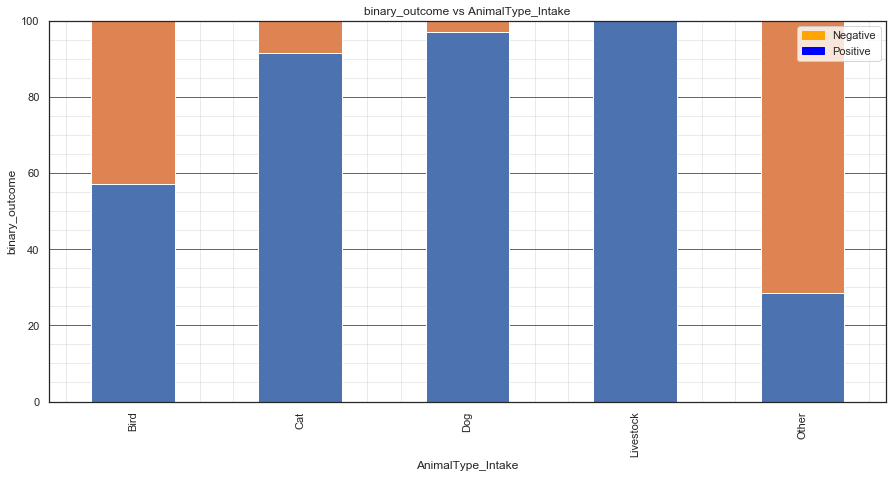

In [79]:
#Using code from the module lab
AnimalType_Intake = pd.unique(df["AnimalType_Intake"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("AnimalType_Intake")
print("Index \t Count")

# for each delinquency category
for i in AnimalType_Intake:
    
    count = df[df["AnimalType_Intake"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['AnimalType_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','AnimalType_Intake','binary_outcome']].groupby(['AnimalType_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs AnimalType_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("AnimalType_Intake")
my_plot.set_ylabel("binary_outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for animal type intake against the target binary outcome. 

- A significant amount of other type animals have a negative outcome, approx 70%.
- Approx 45% of birds have a negative outcome.
- All other intake types have similar low negative outcome percentage ranging from approx 0-10%, these include cat, dog, and livestocks
- Judging from this new features might be derived if we have more information of the 'other' type.Further investigation is needed.
- Animal type is a potential candidate for a predicting binary outcome

Breed_Intake
Index 	 Count
Domestic Shorthair 	 45
Pit Bull type 	 132
Domestic Shorthair Mix 	 287
Chihuahua Shorthair Mix 	 55
Others 	 295
German Shepherd Mix 	 23
Labrador Retriever Mix 	 72
Domestic Longhair Mix 	 14
Australian Cattle Dog Mix 	 10
Siamese Mix 	 12
Domestic Medium Hair Mix 	 21
Bat 	 26


(0, 100)

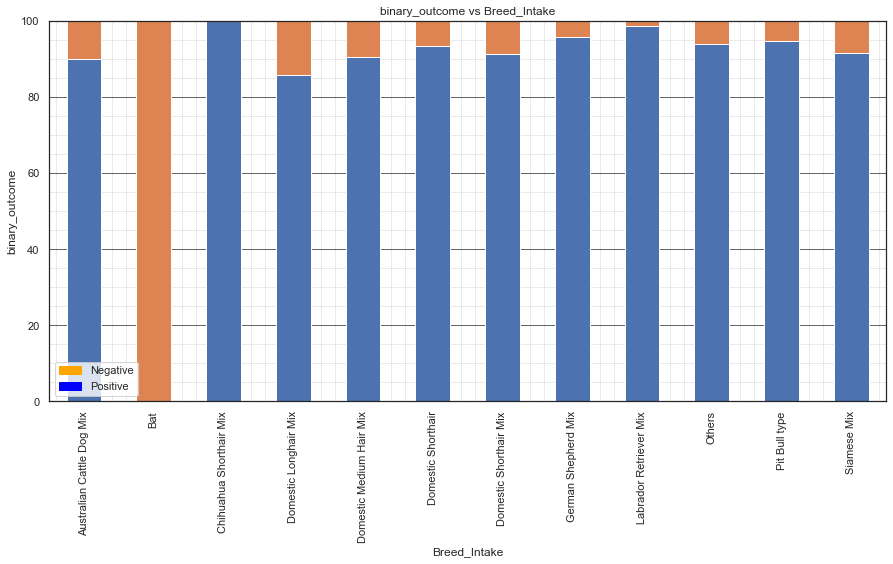

In [80]:
#Using code from the module lab
Breed_Intake = pd.unique(df["Breed_Intake"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("Breed_Intake")
print("Index \t Count")

# for each delinquency category
for i in Breed_Intake:
    
    count = df[df["Breed_Intake"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Breed_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Breed_Intake','binary_outcome']].groupby(['Breed_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Breed_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Breed_Intake")
my_plot.set_ylabel("binary_outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for breed intake against the target binary outcome. 

- Almost 100% of bats have negative outcome.
- All other animal breeds have more or less the same binary outcome rate, ranging from 0-15%.
- It indicates that other than bat, aniamls with all other breeds seems to have simliar binary outcome and bats is a good indicator to predict the binary outcome.
- Judging from this we could derive a new feature of with a binary value, animal type is bat or not, without losing much information.
- In summary 
    - If animals are bats there is approx 100% likelihood of a negative outcome

    - If animals are not bats there is approx 10% likelihood of a negative outcome
    - Breed intake is a good marker to predict the outcome.

Color_Intake
Index 	 Count
Pattern 	 332
Bi color 	 407
Red series 	 16
Brown series 	 69
Black 	 90
White 	 28
Blue series 	 27
Gold series 	 15
Gray 	 8


(0, 100)

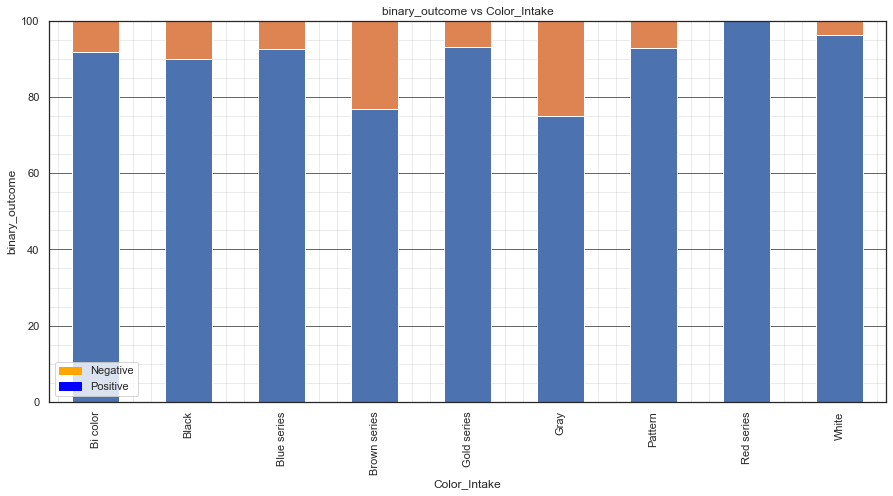

In [81]:
#Using code from the module lab
Color_Intake = pd.unique(df["Color_Intake"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("Color_Intake")
print("Index \t Count")

# for each delinquency category
for i in Color_Intake:
    
    count = df[df["Color_Intake"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Color_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Color_Intake','binary_outcome']].groupby(['Color_Intake','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Color_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Color_Intake")
my_plot.set_ylabel("binary_outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for color intake against the target binary outcome. 

- Animals with gray color and brown series has higher negative outcome rate than all other colors, approx 25%, but not a significant percentage.
- Animals with all other color series or patterns have similar positive outcome rate, ranging from approx 0-10%.
- Overall, although the percentage of animals with gray color and brown series that have a negative outcome is not very high, yet when comparing to other categories, it is at least a double more likely to negative outcome(25% & 0-10%).
- Therefore, we can summarized that the likelihood of animals with gray color and brown series to have a negative outcome is relatively high, and color is also a potential candidate for a predicting binary outcome.

SexuponOutcome
Index 	 Count
Spayed Female 	 300
Intact Female 	 145
Unknown 	 86
Intact Male 	 124
Neutered Male 	 337


(0, 100)

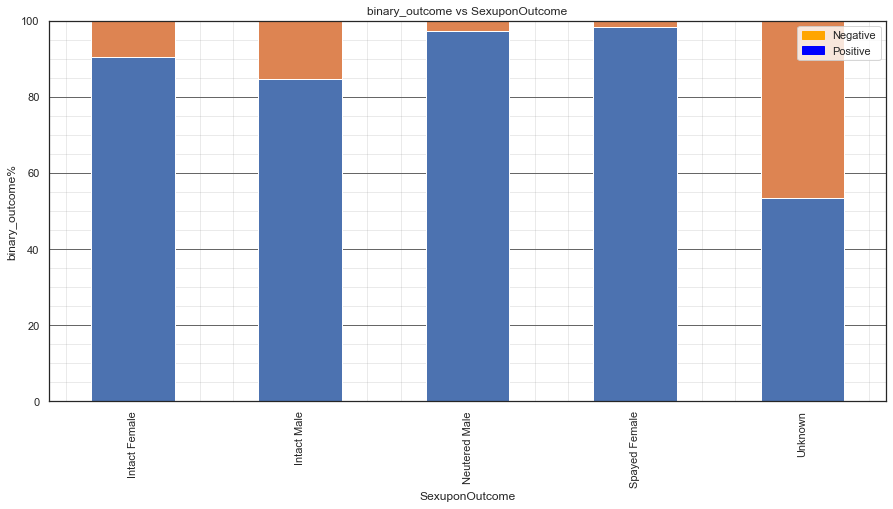

In [82]:
#Using code from the module lab
SexuponOutcome = pd.unique(df["SexuponOutcome"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("SexuponOutcome")
print("Index \t Count")

# for each delinquency category
for i in SexuponOutcome:
    
    count = df[df["SexuponOutcome"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['SexuponOutcome'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','SexuponOutcome','binary_outcome']].groupby(['SexuponOutcome','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs SexuponOutcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("SexuponOutcome")
my_plot.set_ylabel("binary_outcome%")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for sex upon outcome against the target binary outcome. 

- In general, sterilised aniamls have higher positive outcome rate than intact animals regardness of gender, intact animals have approx 10-15% of negative outcome rate, and sterilized aniamls have approx 5% of negative outcome rate.
- Approx 45% of unknown sex animals have negative outcome, a relatively large percentage.
- We could thus derive a new feature that have three categories, intact, sterilized and unknown, without losing much information.
- Sex upon outcome is a potential candidate for a predicting binary outcome.

DateTime_Outcome
Index 	 Count
10 	 92
11 	 86
7 	 99
9 	 84
3 	 62
6 	 86
8 	 102
12 	 84
2 	 54
4 	 79
1 	 68
5 	 96


(0, 100)

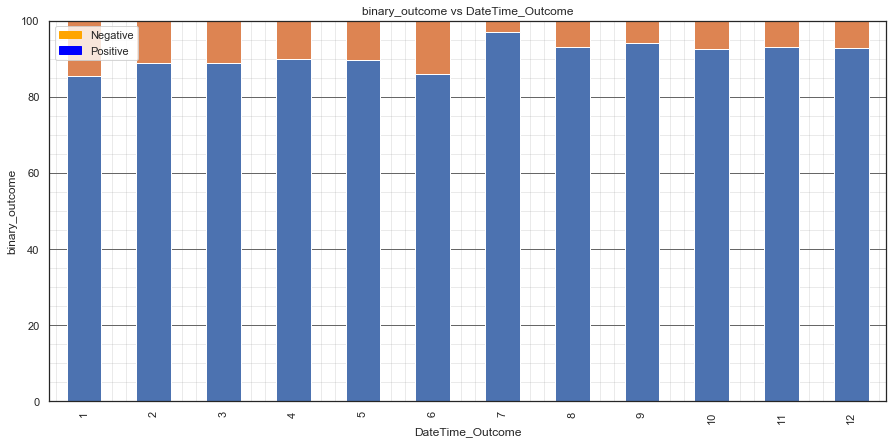

In [83]:
#Using code from the module lab
DateTime_Outcome = pd.unique(df["DateTime_Outcome"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("DateTime_Outcome")
print("Index \t Count")

# for each delinquency category
for i in DateTime_Outcome:
    
    count = df[df["DateTime_Outcome"] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DateTime_Outcome'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DateTime_Outcome','binary_outcome']].groupby(['DateTime_Outcome','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs DateTime_Outcome", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("DateTime_Outcome")
my_plot.set_ylabel("binary_outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for datetime outcome against the target binary outcome. 

- There is a slight decrease likelihood of negative outcomes in the seond half of a year, as oppose to the first half.
- In the first half of the year(January to June), the negative outcome rate is approx 12%, while in the second half it is pprox 7%.
- Overall, this doesn't tell us much information since the difference is relativaly low, and datetime outcome thus seems not a good marker for predicting the outcome.

### Continuous-categorical feature plots

1. Plot age upon intake vs binary outcome

<Figure size 432x288 with 0 Axes>

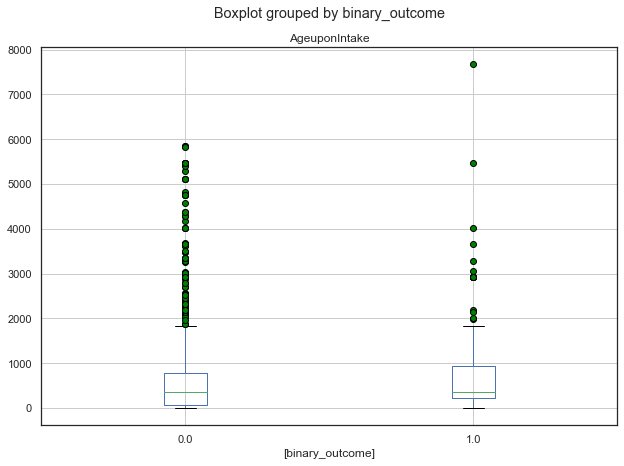

In [84]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['AgeuponIntake'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

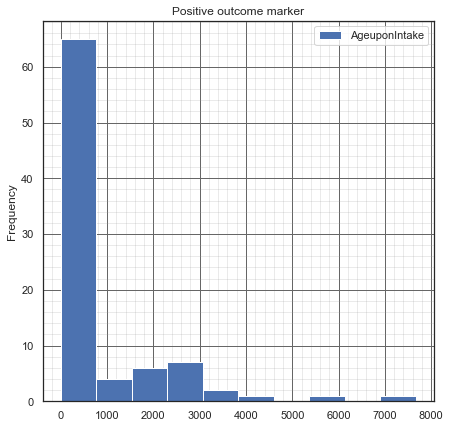

In [85]:
df[df['binary_outcome'] == 1][['AgeuponIntake']].plot(kind='hist',figsize=(7,7), bins=10, title="Positive outcome marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

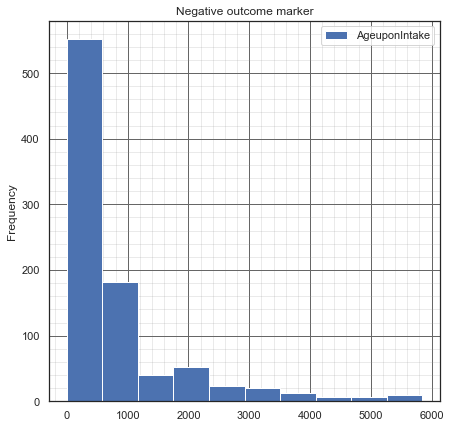

In [86]:
df[df['binary_outcome'] == 0][['AgeuponIntake']].plot(kind='hist',figsize=(7,7), bins=10, title="Negative outcome marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

- We can see from the above box plots that the median number of age upon intake with a positive outcome is 400 whcih is more or less the same with that for a negative outcome. The difference is minimal
-  This can also be seen from the above histograms. Although in the range of 500-1000 days there are more positive outcome, there is overall no clear difference between both
-  There is no clear trend here so we can say the age upon intakes does not have a big effect on the binary outcome

2. Plot Percentage of age upon outcome With Balance vs binary outcome

<Figure size 432x288 with 0 Axes>

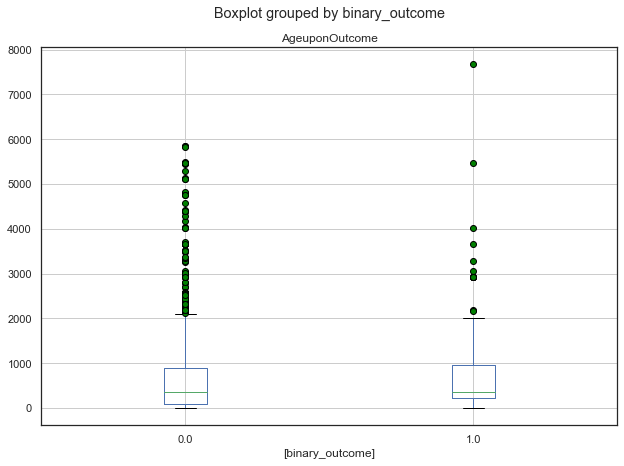

In [87]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['AgeuponOutcome'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

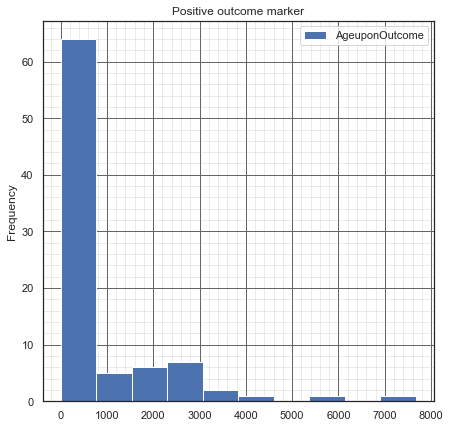

In [88]:
df[df['binary_outcome'] == 1][['AgeuponOutcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Positive outcome marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

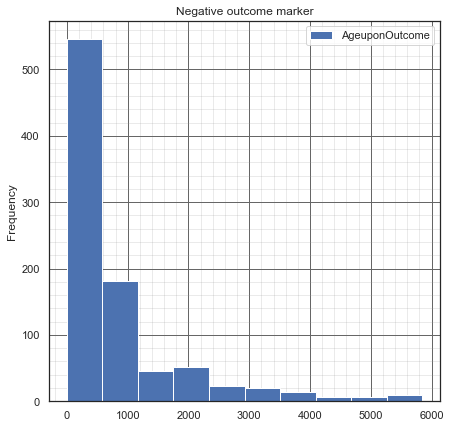

In [89]:
df[df['binary_outcome'] == 0][['AgeuponOutcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Negative outcome marker")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

- We can see from the above box plots that the median number of age upon outcome with a positive outcome is approx 400 whcih is more or less the same with that for a negative outcome. The difference is minimal

-  This can also be seen from the above histograms. Although in the range of 500-1000 days there are more positive outcome, there is overall no clear difference between both
-  There is no clear trend here so we can say the age upon intakes does not have a big effect on the binary outcome
- However, we do roughly see that by comparing age upon intake and age upon outcome, most animals stay in the shelters for only a few days. Judging from this, a new feature that indicates the days each animal stays in shelter could be derived after further investigation.

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.

- Continuous vs Continuous
    - We picked the continuous features that we would expect to have a stronger impact on binary outcome.
    - We see a strong connection between the age upon intake and the age upon outcome. 
    -  This however does not give us much additional information only that one of the features may be redundant since they show very similar data
    
- Categorical vs Categorical
   - In general the subset we picked do have a relatively strong connection with the binary outcome, i.e., they are good markers to predict the outcome.
   - We see a significant drop in the likelihood of a positive outcome if the animal are intake as euthanasia request or wildlife.
   - We do also see a fairly significant drop in the likelihood of a positive outcome if the animal are not healthy(injured or sick). This is as expected and makes a strong case for having a binary feature, marking if a animal is healthy or not.
   - The case of animal type intake is a bit special here. We do see a significant drop in the likelihood of a positive outcome if the animal are 'other' type. A new feature could be derived if we have more information of the 'other' type.
   - We see a huge drop in the likelihood of a positive outcome if the breed of the animal is a bat. A binary feature could be derived marking if a animal is a bat or not.
   - The likelihood of animals with gray color and brown series to have a negative outcome is also relatively high
   - A more certain sex has a higher likelihood to have a positive outcome, among the certain sex, sterilized animals are more likely to have a positive outcome than intact animals. This is as expected and makes a strong case for having a new feature, marking if a animal is intact, sterilized or have unknown sex.   
   - We see no strong connection between the datetime outcome and the likelihood of a negative outcome.

- Continuous vs Categorical
    - There is no strong connection between age upon intake, age upon outcome and binary outcome.
    - By comparing age upon intake and age upon outcome, we can see that most animals stay in the shelters for only a few days. Judging from this, a new feature that indicates the days each animal stays in shelter could be derived after further investigation.

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1** 
- Health_condition : Measures if an animal is in good health condition, i.e, is not sick or injured.
- From analysis of the data if an animal is in good health condition, the type of helth issues is not so important
- Therefore it is makes sense to derive a feature with a binary outcome, healthy or not

In [90]:
#copy the values in 'IntakeCondition' to a new column 'Health_condition'
df['Health_condition'] = df['IntakeCondition']

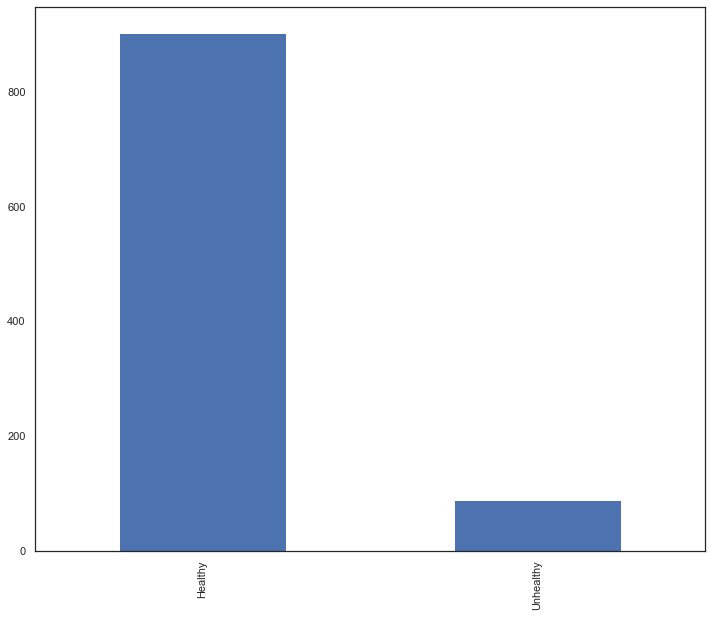

In [91]:
df["Health_condition"]=df["Health_condition"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["Health_condition"])): #for each row index of length of column "Health_condition"
    column_index=df.columns.get_loc("Health_condition") #get column index
    health_condition=df.iat[row_index, column_index] #get content of the cell based on row and column index

    if 'Sick' in health_condition or 'Injured' in health_condition:
        df.iloc[[row_index], [column_index]]=('Unhealthy')        
    else:
        df.iloc[[row_index], [column_index]]=('Healthy') 

df['Health_condition'] = df['Health_condition'].astype('category') #convert it back to 'category'
df['Health_condition'].value_counts().plot(kind='bar', figsize=(12,10))

Generate stacked bar plot Health

/Users/chungwingki/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:631: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


Health_condition
Index 	 Count
Healthy 	 903
Unhealthy 	 89


(0, 100)

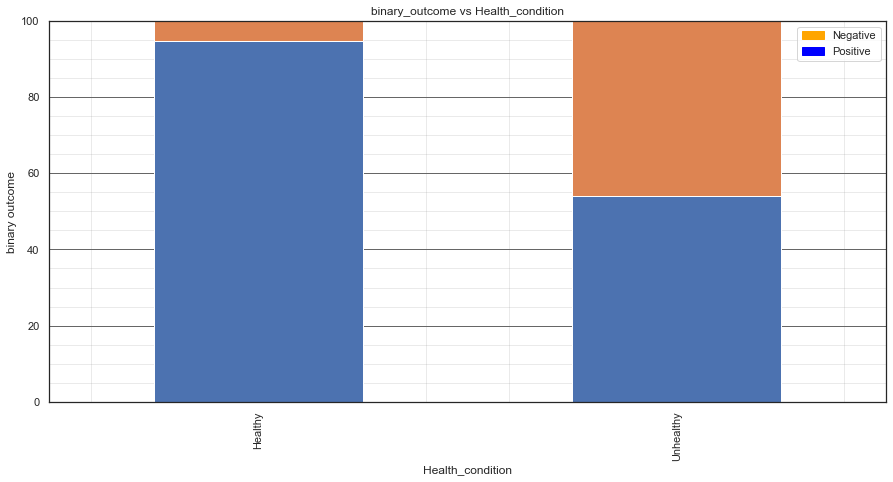

In [92]:
#Using code from the module lab
Health_condition = pd.unique(df['Health_condition'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('Health_condition')
print("Index \t Count")

# for each health condition
for i in Health_condition:
    
    count = df[df['Health_condition'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Health_condition'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','Health_condition','binary_outcome']].groupby(['Health_condition','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs Health_condition", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("Health_condition")
my_plot.set_ylabel("binary outcome")
my_plot.set_ylim([0,100])

#### **New feature 2** 

- SexOutcome: Measures if an animal is intact, sterilized or has unknown sex
- From analysis of the data sterilised animals have higher positive outcome rate than intact animals regardness of gender, the negative outcome rate of unknown sex animals is also different and higher than both sterilised and intact aniamls
- Therefore it is makes sense to transform the 'SexuponOutcome' to a feature with three categories, intact, sterilized and unknown, without losing much information.

In [93]:
#copy the values in 'SexuponOutcome' to a new column 'SexOutcome' since
# we still want to keep the original untransformed feature in case of any further analysis needed
df['SexOutcome'] = df['SexuponOutcome']

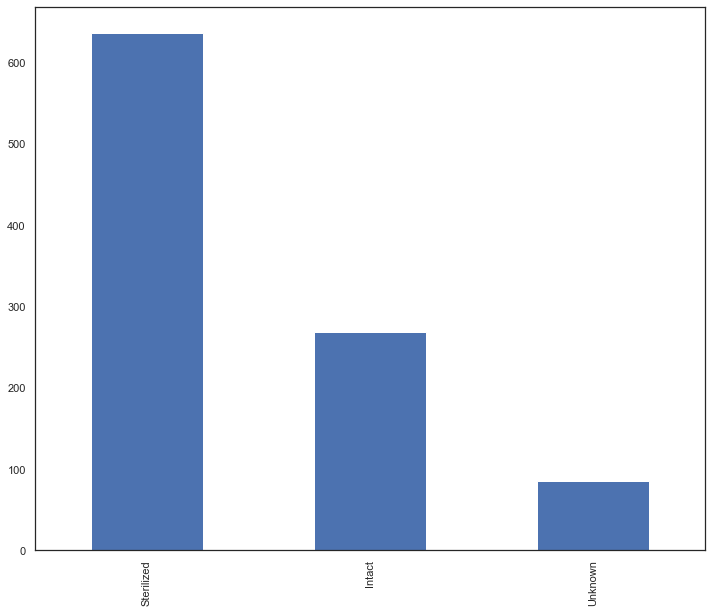

In [94]:
df["SexOutcome"]=df["SexOutcome"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["SexOutcome"])): #for each row index of length of column "SexOutcome"
    column_index=df.columns.get_loc("SexOutcome") #get column index
    SexOutcome=df.iat[row_index, column_index] #get content of the cell based on row and column index

    if 'Intact' in SexOutcome:
        df.iloc[[row_index], [column_index]]=('Intact')        
    elif 'Spayed' in SexOutcome or 'Neutered' in SexOutcome:
        df.iloc[[row_index], [column_index]]=('Sterilized') 

df["SexOutcome"]=df["SexOutcome"].astype('category') #convert it back to 'category'
df["SexOutcome"].value_counts().plot(kind='bar', figsize=(12,10))

Generate stacked bar plot SexOutcome

SexOutcome
Index 	 Count
Sterilized 	 637
Intact 	 269
Unknown 	 86


(0, 100)

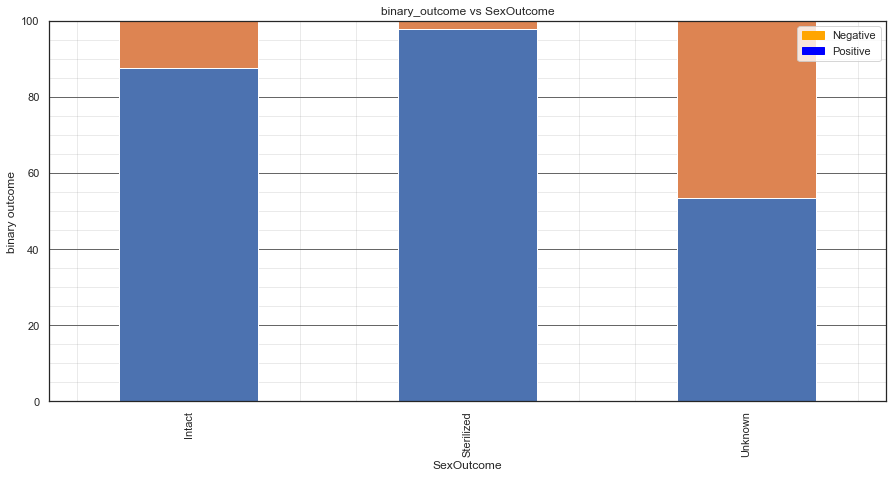

In [95]:
#Using code from the module lab
SexOutcome = pd.unique(df['SexOutcome'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('SexOutcome')
print("Index \t Count")

# for each health condition
for i in SexOutcome:
    
    count = df[df['SexOutcome'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['SexOutcome'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','SexOutcome','binary_outcome']].groupby(['SexOutcome','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs SexOutcome", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("SexOutcome")
my_plot.set_ylabel("binary outcome")
my_plot.set_ylim([0,100])

#### **Investigation for New Feature 3**
Since in the feature animal type intake, we see a significant drop in the likelihood of a positive outcome if the animal are 'other' type. Investigiation will be conducted here first before decide whether to derive a new feature based on the data of animal type intake or not

In [96]:
#Get the dataframe when animaltype intake is 'Other' 
other_in_animaltype=df[df['AnimalType_Intake']=='Other']

#Find out the number of bats in 'Other' animaltype intake
Bats_in_other=df[(df['AnimalType_Intake']=='Other')]["Breed_Intake"].value_counts()['Bat']

#Find out the number of negative outcome(1.0) when animaltype intake is 'Other' 
Neg_in_other=other_in_animaltype[df["binary_outcome"]== 1.0]["binary_outcome"].value_counts()

#Find out the negative outcome percentage when animaltype intake is 'Other' and breed is bat 
bats_in_others_NegPct=Bats_in_other/Neg_in_other
bats_in_others_NegPct

/Users/chungwingki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1.0    0.742857
0.0         inf
Name: binary_outcome, dtype: float64

We can see that among the 'other' animal type intake, approx 75% of negative outcome are constitued of bats. And combining with the data we obtained from the last section(in the breeds intake part) that bat has nearly 100% of negative outcome rate, we can thus derive a new feature indicating whether the animal are bats or not.

**New Feature 3**

- BatsOrNot: Measure whether the animal is bat or not
- From analysis of the data and investigation if an animal is a bat the negative outcome rate will surge
- Therefore it is makes sense to derive a feature with a binary outcome, whether the animal is a bat or not

In [97]:
#copy the values in 'Breed_Intake' to a new column 'BatsOrNot' since
# we still want to keep the original untransformed feature in case of any further analysis needed
df['BatsOrNot'] = df['Breed_Intake']

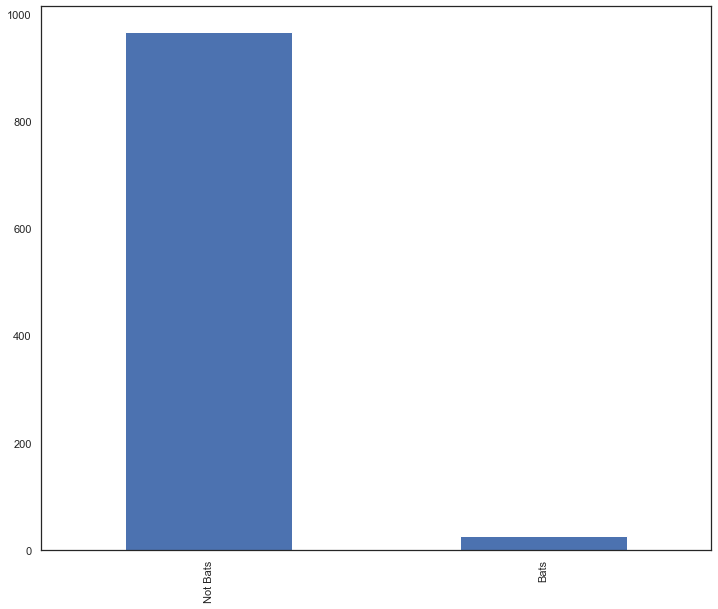

In [98]:
df["BatsOrNot"]=df["BatsOrNot"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["BatsOrNot"])): #for each row index of length of column "BatsOrNot"
    column_index=df.columns.get_loc("BatsOrNot") #get column index
    BatsOrNot=df.iat[row_index, column_index] #get content of the cell based on row and column index

    if 'Bat' in BatsOrNot:
        df.iloc[[row_index], [column_index]]=('Bats')        
    else:
        df.iloc[[row_index], [column_index]]=('Not Bats') 

df["BatsOrNot"]=df["BatsOrNot"].astype('category') #convert it back to 'category'
df["BatsOrNot"].value_counts().plot(kind='bar', figsize=(12,10))

Generate stacked bar plot SexOutcome

BatsOrNot
Index 	 Count
Not Bats 	 966
Bats 	 26


(0, 100)

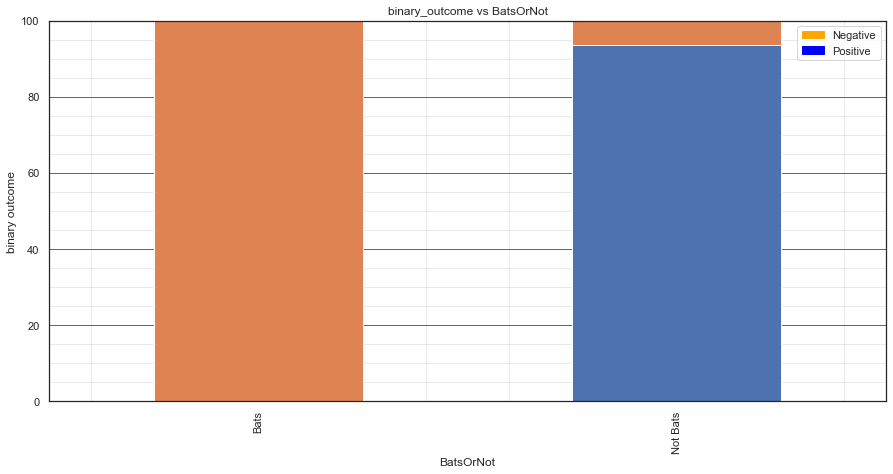

In [99]:
#Using code from the module lab
BatsOrNot = pd.unique(df['BatsOrNot'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('BatsOrNot')
print("Index \t Count")

# for each health condition
for i in BatsOrNot:
    
    count = df[df['BatsOrNot'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['BatsOrNot'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','BatsOrNot','binary_outcome']].groupby(['BatsOrNot','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs BatsOrNot", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("BatsOrNot")
my_plot.set_ylabel("binary outcome")
my_plot.set_ylim([0,100])

#### **New Feature 4**
- DaysInShelter: Measures the range of days animals stay in the shelter
- Investigation will be made to decide the range
- Would expect a large number of animals stay for only a few days based on the histogram ploted in the last part

In [100]:
df['DaysInShelter'] = df['AgeuponOutcome'] - df['AgeuponIntake']

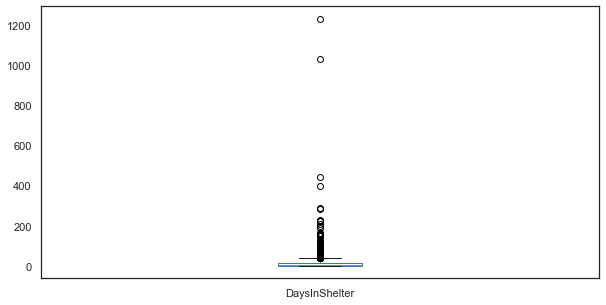

In [101]:
# Plot box plots for 'DaysInShelter'
f = df['DaysInShelter'].plot(kind='box', figsize=(10,5))
plt.show()  

We can clearly see that most aniamls stay in shelter for approx 0 days because the interquartile range, median and minimum are almost the same at approx 0, while the maximum is slightly higher. Therefore, for this new feature, we will focus on comparing the difference between small amount of days and range are set based on this

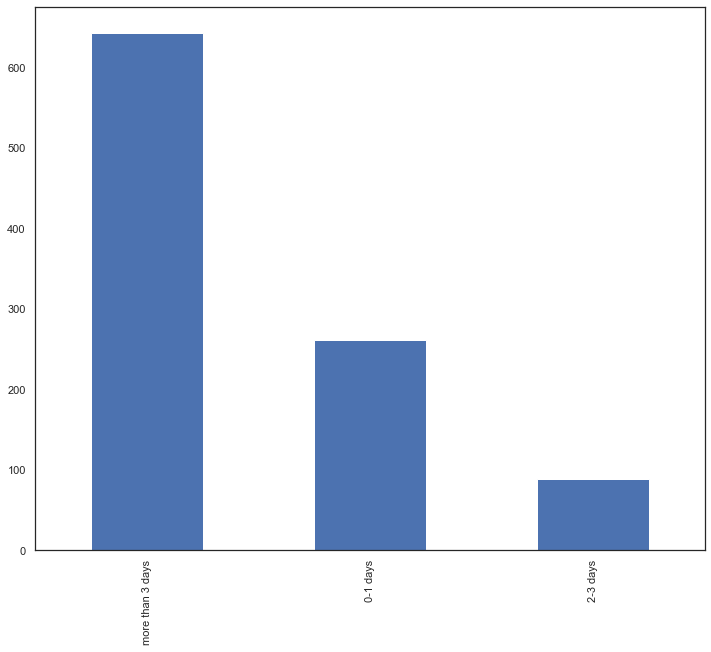

In [102]:
df["DaysInShelter"]=df["DaysInShelter"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["DaysInShelter"])): #for each row index of length of column "DaysInShelter"
    column_index=df.columns.get_loc("DaysInShelter") #get column index
    DaysInShelter=df.iat[row_index, column_index] #get content of the cell based on row and column index
    if DaysInShelter <=1:
        df.iloc[[row_index], [column_index]]=('0-1 days')  
    elif DaysInShelter <=3:
        df.iloc[[row_index], [column_index]]=('2-3 days')  
    else:
        df.iloc[[row_index], [column_index]]=('more than 3 days')
df["DaysInShelter"]=df["DaysInShelter"].astype('category') #convert it back to 'category'
df["DaysInShelter"].value_counts().plot(kind='bar', figsize=(12,10))

/Users/chungwingki/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:631: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


DaysInShelter
Index 	 Count
more than 3 days 	 643
2-3 days 	 88
0-1 days 	 261


(0, 100)

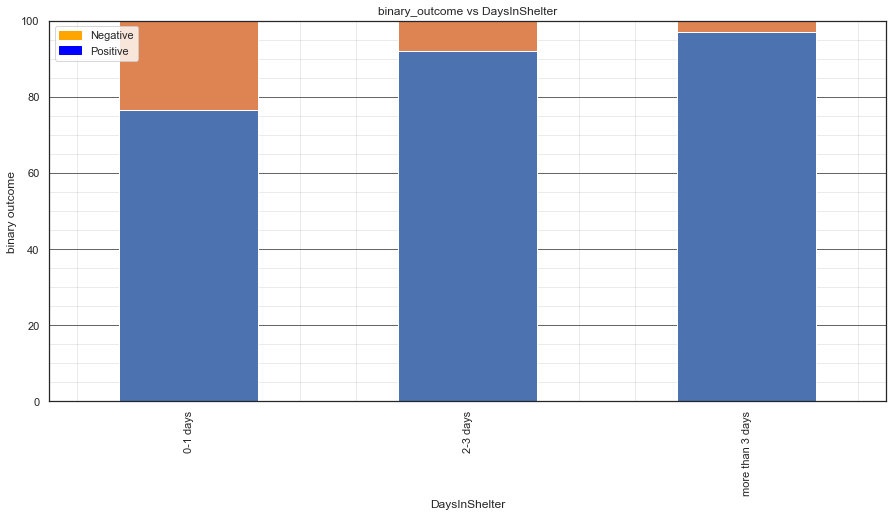

In [103]:
#Using code from the module lab
DaysInShelter = pd.unique(df['DaysInShelter'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('DaysInShelter')
print("Index \t Count")

# for each health condition
for i in DaysInShelter:
    
    count = df[df['DaysInShelter'] == i].count()['binary_outcome']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DaysInShelter'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DaysInShelter','binary_outcome']].groupby(['DaysInShelter','binary_outcome']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="binary_outcome vs DaysInShelter", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("DaysInShelter")
my_plot.set_ylabel("binary outcome")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for the new feature 'dayInShelter' against the target binary outcome.
- There is approx 24% likelihood of negative outcomes if the animals stay for less than 1 dyas.
- Approx 7% of animals have negative outcome if they stay in the shelter for 2-3 days
- Only Approx 3% of animals have negative outcome if they stay in the shelter for more than 3 days
- There is a clear trend of decreasing likelihood of negative outcomes as days in shelters increase
- Overll, the new feature days in shelter is a good indicater of predicting the binary outcome

### To finish - Print data types, descriptive tables, save to csv

In [104]:
df.dtypes

AnimalID               object
DateTime_Intake      category
FoundLocation        category
IntakeType           category
IntakeCondition      category
AnimalType_Intake    category
SexuponIntake        category
AgeuponIntake           int64
Breed_Intake         category
Color_Intake         category
DateTime_Outcome     category
DateofBirth          category
SexuponOutcome       category
AgeuponOutcome          int64
binary_outcome       category
percent               float64
Health_condition     category
SexOutcome           category
BatsOrNot            category
DaysInShelter        category
dtype: object

Print continuous statistics

In [105]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,992.0,780.548387,1105.729441,0.000000,62.000000,365.000000,783.250000,7670.000000
AgeuponOutcome,992.0,800.413306,1104.058498,0.000000,87.750000,368.000000,910.250000,7671.000000
percent,992.0,0.302419,0.278342,0.155521,0.155521,0.155521,0.383142,1.136364


In [106]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
DateTime_Intake,992,12,6,103
FoundLocation,992,14,Austin,839
IntakeType,992,5,Stray,719
IntakeCondition,992,8,Normal,870
AnimalType_Intake,992,5,Dog,534
SexuponIntake,992,5,Intact Male,337
Breed_Intake,992,12,Others,295
Color_Intake,992,9,Bi color,407
DateTime_Outcome,992,12,8,102
DateofBirth,992,12,4,128


In [107]:
# Write the cleaned dataframe to a csv file
df.to_csv('Animal_Welfare_1-3_cleaned_new_features.csv', index=False)

NameError: name 'df' is not defined